# Practical Cryptography in Python: Working Notebook

#### This notebook consists of my working solutions to the Practical Cryptography in Python workbook

In [ ]:
# Needed to install from 
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#gmpy
# Thanks to
# https://stackoverflow.com/questions/58421429/python-pip-install-gmpy-on-windows-10-returns-cl-exe-failed-with-exit-statu
import os
import json
import gmpy2

# Chapter 1 - Cryptography: More than Secrecy

### Excercise 1.1 - Shift (Ceaser) Cypher Encoder

In [ ]:
from collections import deque

# Generates the relationship between 
# characters; or the shift that the 
# alphabet is rotated
def create_shift(shift, decoding=False):
    # Build an alphabet deque that can be rotated
    alphabet_ascii_values = range(ord('A'), ord('Z')+1)
    alphabet = deque([chr(val) for val in alphabet_ascii_values])
    
    # Save the ordered alphabet
    ordered_alphabet = list(alphabet)
    
    # Rotate based on the shift value
    alphabet.rotate(shift)
    
    # Save the shifted alphabet AFTER it has been rotated
    shifted_alphabet = list(alphabet)
    
    # Which character is the key and which character is the
    # value depends on whether we want to encode or decode
    # the string. In this instance, encoding is ordered to
    # shifted and decoding is shifted to ordered.
    if decoding:
        return dict(zip(shifted_alphabet, ordered_alphabet))
    else:
        return dict(zip(ordered_alphabet, shifted_alphabet))

# Take a string and encode it into gibberish!
def ceaser_encode(msg, shift=0):
    shift_key = create_shift(shift)
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

# Take gibberish and decode it into English!
def ceaser_decode(msg, shift=0):
    shift_key = create_shift(shift, decoding=True)
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

def printable_substitution(shift):
    alphabet_char, encoded_char = create_shift(shift)
    return "{alphabet_char} -> {encoded_char}".format(alphabet_char, encoded_char)

# Return all of the possible
# different shifts and codes
def brute_force_ceaser(msg):
    return [ceaser_decode(msg, shift) for shift in range(27)]

code = "TOBEORNOTTOBETHATISTHEQUESTOIN"
brute_force_ceaser(code)

['TOBEORNOTTOBETHATISTHEQUESTOIN',
 'UPCFPSOPUUPCFUIBUJTUIFRVFTUPJO',
 'VQDGQTPQVVQDGVJCVKUVJGSWGUVQKP',
 'WREHRUQRWWREHWKDWLVWKHTXHVWRLQ',
 'XSFISVRSXXSFIXLEXMWXLIUYIWXSMR',
 'YTGJTWSTYYTGJYMFYNXYMJVZJXYTNS',
 'ZUHKUXTUZZUHKZNGZOYZNKWAKYZUOT',
 'AVILVYUVAAVILAOHAPZAOLXBLZAVPU',
 'BWJMWZVWBBWJMBPIBQABPMYCMABWQV',
 'CXKNXAWXCCXKNCQJCRBCQNZDNBCXRW',
 'DYLOYBXYDDYLODRKDSCDROAEOCDYSX',
 'EZMPZCYZEEZMPESLETDESPBFPDEZTY',
 'FANQADZAFFANQFTMFUEFTQCGQEFAUZ',
 'GBORBEABGGBORGUNGVFGURDHRFGBVA',
 'HCPSCFBCHHCPSHVOHWGHVSEISGHCWB',
 'IDQTDGCDIIDQTIWPIXHIWTFJTHIDXC',
 'JERUEHDEJJERUJXQJYIJXUGKUIJEYD',
 'KFSVFIEFKKFSVKYRKZJKYVHLVJKFZE',
 'LGTWGJFGLLGTWLZSLAKLZWIMWKLGAF',
 'MHUXHKGHMMHUXMATMBLMAXJNXLMHBG',
 'NIVYILHINNIVYNBUNCMNBYKOYMNICH',
 'OJWZJMIJOOJWZOCVODNOCZLPZNOJDI',
 'PKXAKNJKPPKXAPDWPEOPDAMQAOPKEJ',
 'QLYBLOKLQQLYBQEXQFPQEBNRBPQLFK',
 'RMZCMPLMRRMZCRFYRGQRFCOSCQRMGL',
 'SNADNQMNSSNADSGZSHRSGDPTDRSNHM',
 'TOBEORNOTTOBETHATISTHEQUESTOIN']

### Excercise 1.2 - Automated Decoding

In [ ]:
import pandas as pd

# Import a list of the 10,000 most common
# words used in English
common_words = pd.read_csv(r'./data/unigram_freq.csv')

most_common_words = common_words.iloc[:10_000].word.values

# Generate a list of all possible 26 shifts
# of the Ceaser Cypher
all_shifts = brute_force_ceaser(code)

# For each shift of the ceaser cypher, count
# how many times each of the most_common_words
# appears within the cypher
word_frequency = {}
for shift in all_shifts:
    word_frequency[shift] = 0
    for word in most_common_words:
        if (word==word) and (word in shift.lower()):
            word_frequency[shift] += 1

# Convert the substring frequency to a 
# dataframe for a cleaner output
word_freq_df = pd.DataFrame.from_dict(word_frequency, orient='index')
word_freq_df.columns = ["Words Found"]
word_freq_df.sort_values(by="Words Found", ascending=False, inplace=True)

word_freq_df

Words Found
TOBEORNOTTOBETHATISTHEQUESTOIN           42
GBORBEABGGBORGUNGVFGURDHRFGBVA           33
SNADNQMNSSNADSGZSHRSGDPTDRSNHM           32
RMZCMPLMRRMZCRFYRGQRFCOSCQRMGL           32
IDQTDGCDIIDQTIWPIXHIWTFJTHIDXC           30
EZMPZCYZEEZMPESLETDESPBFPDEZTY           29
NIVYILHINNIVYNBUNCMNBYKOYMNICH           29
MHUXHKGHMMHUXMATMBLMAXJNXLMHBG           29
AVILVYUVAAVILAOHAPZAOLXBLZAVPU           29
UPCFPSOPUUPCFUIBUJTUIFRVFTUPJO           29
HCPSCFBCHHCPSHVOHWGHVSEISGHCWB           28
XSFISVRSXXSFIXLEXMWXLIUYIWXSMR           28
FANQADZAFFANQFTMFUEFTQCGQEFAUZ           27
BWJMWZVWBBWJMBPIBQABPMYCMABWQV           26
LGTWGJFGLLGTWLZSLAKLZWIMWKLGAF           25
PKXAKNJKPPKXAPDWPEOPDAMQAOPKEJ           25
CXKNXAWXCCXKNCQJCRBCQNZDNBCXRW           24
OJWZJMIJOOJWZOCVODNOCZLPZNOJDI           23
DYLOYBXYDDYLODRKDSCDROAEOCDYSX           22
WREHRUQRWWREHWKDWLVWKHTXHVWRLQ           22
ZUHKUXTUZZUHKZNGZOYZNKWAKYZUOT           22
YTGJTWSTYYTGJYMFYNXYMJVZJXYTNS           21
QLYBLOKLQQLYBQEXQFPQEBNRBPQLFK           21
JERUEHDEJJERUJXQJYIJXUGKUIJEYD           20
KFSVFIEFKKFSVKYRKZJKYVHLVJKFZE           20
VQDGQTPQVVQDGVJCVKUVJGSWGUVQKP           20

### Excercise 1.3 - A Strong Substitution Cypher
#### Instead of shifting the alphabet by one, the alphabet is randomly scrambled

In [ ]:
import random

# Generates the relationship between 
# characters; or the shift that the 
# alphabet is rotated
def create_rando_shift():
    # Build an alphabet deque that can be rotated
    alphabet_ascii_values = range(ord('A'), ord('Z')+1)
    alphabet = [chr(val) for val in alphabet_ascii_values]
    
    # Get our original alphabet
    ordered_alphabet = alphabet[:]
    
    # Jumble the letters
    random.shuffle(alphabet)
    
    # Get our jumbled list
    shuffled_alphabet = alphabet
    
    # Return our encoding shift!
    return dict(zip(ordered_alphabet, shuffled_alphabet))

# Take a string and encode it into gibberish!
def rando_encode(msg, shift_key):
    for character in msg.upper():
        print(character, shift_key[character])
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

def printable_substitution(shift):
    alphabet_char, encoded_char = create_shift(shift)
    return "{alphabet_char} -> {encoded_char}".format(alphabet_char, encoded_char)

# Return all of the possible
# different shifts and codes
def brute_force_ceaser(msg):
    return [ceaser_decode(msg, shift) for shift in range(27)]

shift = create_rando_shift()
shift

{'A': 'Y',
 'B': 'W',
 'C': 'T',
 'D': 'U',
 'E': 'M',
 'F': 'F',
 'G': 'O',
 'H': 'L',
 'I': 'J',
 'J': 'A',
 'K': 'S',
 'L': 'Q',
 'M': 'I',
 'N': 'B',
 'O': 'Z',
 'P': 'G',
 'Q': 'H',
 'R': 'D',
 'S': 'X',
 'T': 'K',
 'U': 'N',
 'V': 'E',
 'W': 'C',
 'X': 'V',
 'Y': 'R',
 'Z': 'P'}

### Excercise 1.4 - Count the Dictionaries

#### Q: How many substitution dictionaries are possible for the cryptogram-style substitution in excercise 1.3?
**A**: Since the alphabet is a set of 26 characters and these 26 characters are randomly scrambled, there should be 26! (4.033e+26) different possible substitution dictionaries. This is because when we start assigning characters to our dictionary we can assign A to be any of the other 26 possible characters in the alphabet. We can then assign B to any of the 25 remaining characters, C to any of the 24 remaining characters, etc. We repeat this process 25 more times to get 26*(26-1)*(26-2)... = 26!

# Chapter 2 - Hashing

### Excercise 2.1 - Welcome to MD5

#### As the author warns, MD5 is not a secure hashing algorithm for encryption.

In [ ]:
import hashlib
md5hasher = hashlib.md5()
md5hasher.hexdigest()

'd41d8cd98f00b204e9800998ecf8427e'

In [ ]:
hashlib.md5(b'alice').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

In [ ]:
hashlib.md5(b'bob').hexdigest()

'9f9d51bc70ef21ca5c14f307980a29d8'

In [ ]:
hashlib.md5(b'alice').hexdigest() + hashlib.md5(b'bob').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c9f9d51bc70ef21ca5c14f307980a29d8'

In [ ]:
hashlib.md5(b'alice').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

In [ ]:
hashlib.md5(b'alicebob').hexdigest()

'ec0048c7d6b5a11cdb261b71a813eff3'

In [ ]:
hashlib.md5(b'aaa'*1000).hexdigest()

'6ca003d00c9bb4569a4a27d751db7a89'

In [ ]:
len('6ca003d00c9bb4569a4a27d751db7a89')

32

I learned that each unique string (or binary representation of a string) encrypted using MD5 has a unique hash result. Regardless of the length of the input string, the output string always has a length of 32 characters.

In [ ]:
md5hasher = hashlib.md5()
md5hasher.update(b'a')
md5hasher.update(b'l')
md5hasher.update(b'i')
md5hasher.update(b'c')
md5hasher.update(b'e')

# Even as the hash is formed letter by letter,
# each hash of "a", "al", "ali", "alic" is 
# unrecognizable from the full hash of the 
# name "alice"
md5hasher.hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

### Excercise 2.2 - Google Knows!

**5f4dcc3b5aa765d61d8327deb882cf99** - Google already identifies this as an MD5 hash of 'password'; probably why the author warns that this is NOT a secure encryption method!

### Aside - Collisions in Birthdays: Simulating the "Same Birthday" Theory

In [ ]:
import numpy as np
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [ ]:
# The author is teaching about collisions in hashing, 
# when two different inputs to a hash function produce 
# the same output. They claim that while it is unlikely
# that two people in a room picked at random have the same
# birthday, it is significantly more likely that any given
# two people in the room have the same birthday. Below is a
# simulation of this idea.
def birthday_theory(num_people, simulations, shared_birthdays=2):
    
    # Counter for the number of simulations where
    # at least two people shared a birthday. 
    # (To adjust the number of people that need to 
    # share a birthday to be counted, the shared_birthdays 
    # parameter can be altered
    contained_shared_birthday = 0
    
    # Simulated over N iterations to generate a
    # probability of colliding birthdays
    for sim_num in range(simulations):
        # Generate an array based on the number of
        # people specified that will represent their
        # birthdays. 
        all_people = np.random.rand(num_people,)
        
        # Multiply that array by 364 and 
        # round to the nearest integer to get the
        # day that person was born. Since this includes
        # the possibility of generating 0, the array is 
        # multiplied by (365-1)
        birthdays = np.round(all_people * 364)
        
        # If we found a matching birthday update 
        # our counter by one
        if matching_birthday(birthdays, shared_birthdays):
            contained_shared_birthday += 1
            
    # Return the probability that any two people in this
    # group shared a birthday
    return contained_shared_birthday / simulations
        
# Use a helper function to determine if there is 
# a matching birthday as quickly as possible
def matching_birthday(birthdays, shared_birthdays):
    for item, count in Counter(birthdays).items():
        if count >= shared_birthdays:
            return True
    return False

## Simulate how the probability of shared birthdays
## increase as the number of people increase
#distribution = {}
#for num_people in tqdm(range(1, 101)):
#    distribution[num_people] = [birthday_theory(num_people=num_people, shared_birthdays=2, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=3, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=4, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=5, simulations=10_000)]
#
## Convert this information to a dataframe so that 
## I don't have to generate it again (took ~2 minutes)
#shared_birthdays = pd.DataFrame.from_dict(distribution).T
#shared_birthdays.columns = [2, 3, 4, 5]
#shared_birthdays.to_csv('./data/shared_birthdays_probability.csv', index=False)

shared_birthdays = pd.read_csv('./data/shared_birthdays_probability.csv')

# Visualization created with reference to 
# https://towardsdatascience.com/clustered-overlapped-bar-charts-with-plotly-express-c752d2925cf1
anchos = [0.6] * 100

fig = go.Figure()
fig.add_trace(go.Bar(y = shared_birthdays['2'], 
                     width = anchos, name = '2 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['3'],
                     width = anchos, name = '3 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['4'],
                     width = anchos, name = '4 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['5'],
                     width = anchos, name = '5 Shared Birthdays'))

fig.update_layout(title =  "Percent Probability of Colliding Birthdays",
                  barmode = 'group', title_font_size = 20)

fig.update_xaxes(title_text = 'Number of People',
         title_font=dict(size=30, family='Verdana', color='black'),
         tickfont=dict(family='Calibri', size=25))
fig.update_yaxes(title_text = "Probability",
         title_font=dict(size=30, family='Verdana', color='black'), 
         tickfont=dict(family='Calibri', size=25))

# fig.show()
print("simulation comlete.")

simulation comlete.


The percent chance of two people sharing a birthday (pct chance of collision) increases significantly faster than I thought. After we have just 56 people in a room, there is already a ~99% chance that two of them share a birthday.

Below, I found a function that could predict the probability of two people sharing a birthday when there were ***n*** people.I compared this value to a simulation and found that there was a ~1.1% difference between my function and the simulation, leading me to believe that my function closely models the "true" probability.

In [ ]:
# The number of edges produced in a densely 
# connected graph with "n" nodes.
def num_edges(n):
    return (n*(n-1)) / 2

# The probability of a collision with "n" entities
# given that there is a "prob" percent chance of an 
# event between any two entities.
def collision_probability(n, prob=1/365):
    num_potential_collisions = (n*(n-1)) / 2
    return 1 - ( (1-prob) ** num_potential_collisions)

#for i in range(2, 50+1):
#    
#    expected = num_edges(i) / 365
#    actual = birthday_theory(num_people=i, simulations=1_000_000)
#    
#    print(f"Number of people: {i}")
#    print(f"Expected value: {expected}")
#    print(f"Computed value: {actual}")
#    print(f"Model Error: {(expected - actual) / expected}\n")

with open('./data/shared_birthdays_simulation.json', 'r') as f:
    computed_results = json.load(f)
    
results = {'Expected': [], 'Computed': []}
for num_people in range(2, 50+1):
    expected = collision_probability(num_people)
    computed = computed_results[str(num_people)]
    results['Expected'] += [expected]
    results['Computed'] += [computed]
    
results_df = pd.DataFrame(results)
results_df['Pct_Diff'] = (results_df['Expected'] - results_df['Computed']) / results_df['Computed']

print(f"Mean percent difference between theoretical values and computational values: {results_df['Pct_Diff'].mean()}")
results_df

Mean percent difference between theoretical values and computational values: -0.010754543750829624


Expected  Computed  Pct_Diff
0   0.002740  0.002831 -0.032241
1   0.008197  0.008283 -0.010421
2   0.016326  0.016197  0.007975
3   0.027062  0.026929  0.004937
4   0.040317  0.040509 -0.004739
5   0.055985  0.056219 -0.004163
6   0.073941  0.073993 -0.000699
7   0.094045  0.095038 -0.010450
8   0.116140  0.117242 -0.009397
9   0.140059  0.141685 -0.011475
10  0.165623  0.167531 -0.011388
11  0.192645  0.194909 -0.011615
12  0.220932  0.224295 -0.014993
13  0.250288  0.253458 -0.012507
14  0.280514  0.283710 -0.011265
15  0.311413  0.315571 -0.013175
16  0.342791  0.346434 -0.010515
17  0.374458  0.379152 -0.012381
18  0.406229  0.412048 -0.014121
19  0.437932  0.443985 -0.013634
20  0.469399  0.475658 -0.013158
21  0.500477  0.508218 -0.015231
22  0.531023  0.539852 -0.016354
23  0.560908  0.568957 -0.014147
24  0.590014  0.598142 -0.013588
25  0.618240  0.627108 -0.014141
26  0.645497  0.654207 -0.013314
27  0.671709  0.681244 -0.013996
28  0.696816  0.706946 -0.014329
29  0.720770  0.731302 -0.014401
30  0.743537  0.754591 -0.014650
31  0.765092  0.775936 -0.013976
32  0.785425  0.796400 -0.013781
33  0.804535  0.814758 -0.012547
34  0.822431  0.832832 -0.012489
35  0.839130  0.849664 -0.012397
36  0.854659  0.864953 -0.011902
37  0.869048  0.878049 -0.010251
38  0.882336  0.891836 -0.010653
39  0.894565  0.903290 -0.009659
40  0.905782  0.914539 -0.009576
41  0.916036  0.924066 -0.008690
42  0.925379  0.932914 -0.008076
43  0.933865  0.940942 -0.007522
44  0.941546  0.948418 -0.007246
45  0.948476  0.955310 -0.007154
46  0.954709  0.960725 -0.006262
47  0.960297  0.965983 -0.005886
48  0.965291  0.970463 -0.005329

In [ ]:
print(f"Percent chance that 100 people share a birthday: {collision_probability(100)}")

Percent chance that 100 people share a birthday: 0.9999987347684783


### Excercise 2.3 - Observing Avalanche
#### The avalanche property is the idea that slightly different inputs to a cryptographic cipher produces significantly different outputs. In this exercise the authors want us to compare the binary representations of slightly different inputs to the MD5 cryptographic cipher.

In [ ]:
import difflib
from itertools import combinations

In [ ]:
# The code below is offered by the authors (listing 2-5) to translate
# the output string back into binary
def md5_binary_output(s):
    hexstring = hashlib.md5(s).hexdigest()
    # Needed to add the zfill code to add
    # leading zeroes to the binary output to
    # match the 128 character long output;
    # Accomplished with reference to 
    # https://stackoverflow.com/questions/1425493/convert-hex-to-binary
    binary = bin(int(hexstring, 16))
    return binary[2:].zfill(128)

# Compare two binary strings of equal length to find
# how many bits have changed and where they have changed.
def changed_bits(binary_string1, binary_string2):
    diff = 0
    diff_str = ""
    # Compare bits at each position in the binary
    # string
    for i, b1 in enumerate(binary_string1):
        # If the two bits are the same in the same
        # position
        if b1 == binary_string2[i]:
            diff_str += "_"
        else:
            diff += 1
            diff_str += "X"
    
    print(diff_str[:64])
    print(diff_str[64:])
    return diff

# A few different inputs to try and compare
inputs = [b'bob',
          b'cob',
          b'blob',
          b'job',
          b'mob',
          b'rob',
          b'fob']

# Compare all different combinations of our inputs
for word1, word2 in combinations(inputs, 2):
    print(f"Difference between {word1} and {word2}")
    num_bits_changed = changed_bits(md5_binary_output(word1),
                                    md5_binary_output(word2))
    
    # looking for ~50% of the bits to change on 
    # any arbitrary difference in strings
    print(f"Pct bits changed: {num_bits_changed / 128}\n")

Difference between b'bob' and b'cob'
X_X__XXXXXXXX_XXXX_X_X___X__XX_____XX_XX_______XXXX_X_X__X_X_X_X
_XX_X__XXX__XXXXXX_XXX_X__X__X_X_X____X__X__X___X_XX_XXX___X___X
Pct bits changed: 0.5

Difference between b'bob' and b'blob'
_XXX___XX_XXX_XXXX_____X__XX_XXXX___X__XX___XX_XX_XXXXXX__X____X
___X_XXX__X___XX__X_X__XXX___X__XX__X___XXXXXXX__X_XXX__X__X__X_
Pct bits changed: 0.5

Difference between b'bob' and b'job'
______X__X______X____X___XXX__X__XX_X_XXXXXXXX___X_X_X___XXX_XX_
___X_X_X_XX_X_XX___XXX_XX_XXXXXXXXX_X__XX___XXX______X__X__X__XX
Pct bits changed: 0.46875

Difference between b'bob' and b'mob'
XX_XXXX__XX_XX_X_XXXX_X_X_XXX_XXX__XX_______XX_X__X___X____XX__X
_XXXX_X____XX_XX_X_XXXXXX_XX__X_XX____XX__X__X_X_XX___X_XX____XX
Pct bits changed: 0.515625

Difference between b'bob' and b'rob'
XXX_X__XX__XXX_X__XX_____X__X_X_XX__XXXX__XX___X_X_X_X______X___
XX___XX_XXX__X_XXX_XXX____X___X_X_XX_X_X_X___XXX___XX_X_X__XXX_X
Pct bits changed: 0.4765625

Difference between b'bob' and b'fo

### Excercise 2.4 - MD5 of a File
#### Encrypt a file using MD5

In [ ]:
with open(r'./data/unigram_freq.csv', 'rb') as f:
    data = f.read()
    
md5_data = hashlib.md5(data).hexdigest()
md5_data

'642676d7bbbb0dbf102b0e20ca32761e'

#### Aside - Listing 2-9; Alphabet Permutations

In [ ]:
# This function is given by the authors as
# Listing 2-9. Alphabet Permutations. It takes
# a string as input and outputs the number of unique
# combinations of that string up to the max_len parameter
def alphabet_permutations(alphabet, max_len):
    if max_len <= 0: return
    for c in alphabet:
        yield c
    for c in alphabet:
        for next in alphabet_permutations(alphabet, max_len-1):
            yield c + next

### Excercise 2.5 - The Power of One

In [ ]:
import string
import time

In [ ]:
# Iterate through the alphabet until the matching
# hash is found
def match_hash(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.md5(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False
        
# Create an alphabet of lowercase letters
alphabet = list(string.ascii_lowercase)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single, lowercase letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_lowercase = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0 seconds
Total time spent checking over 10 iterations:   0.0 seconds


### Excercise 2.6 - The Power of One, but Bigger!

In [ ]:
print(string.printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



#### Upper and Lowercase values

In [ ]:
# Create an alphabet of upper and lowercase letters
alphabet = list(string.ascii_letters)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_all_letters = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0 seconds
Total time spent checking over 10 iterations:   0.0 seconds


#### All printable values

In [ ]:
# Create an alphabet of all printable values
alphabet = list(string.printable)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_all_printable = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0 seconds
Total time spent checking over 10 iterations:   0.0 seconds


There seems to be a negligible difference in runtime when we only need to compare the hashes of individual characters

### Excercise 2.7 - Password Length's Effects on Attack Time

In [ ]:
import matplotlib.pyplot as plt

#### Two-symbol inputs; we will use all ascii letters because I don't want to blow up my computer

In [ ]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 2) if len(val) == 2]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_2_symbol = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0011995077133178712 seconds
Total time spent checking over 10 iterations:   0.012 seconds


#### Three-symbol inputs

In [ ]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 3) if len(val) == 3]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.09319684505462647 seconds
Total time spent checking over 10 iterations:   0.932 seconds


#### Four-symbol inputs (commented out to save time when running full notebook)

In [ ]:
## The function provided by the authors will now come in handy!
## Create an alphabet of all possible 2-symbol inputs
#alphabet = [val for val in alphabet_permutations(string.ascii_letters, 4) if len(val) == 4]
#
## Keeping track of how long it takes to find 
## each hash
#check_time = []
#
## Perform this check N times
#N = 10
#for i in range(N):
#
#    # Randomly select a single letter from this 
#    # alphabet
#    preimage_seed = random.choice(alphabet).encode('utf-8')
#    
#    # Use MD5 to compute the hash of this initial letter
#    test_hash = hashlib.md5(preimage_seed).hexdigest()
#    
#    # Track the time it takes to find the matching hash
#    hash_time_start = time.time()
#    
#    # In a loop, iterate through all possible lowercase
#    # one-letter inputs
#    match_hash(test_hash, alphabet)
#    
#    hash_time_end = time.time()
#    
#    check_time.append(hash_time_end - hash_time_start)
#    
## Amount of time it took to check through
## all lowercase characters
#check_time_4_symbol = check_time
#    
#print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
#print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")
#
## Plotting the amount of time it takes to compare hashes
## of different sizes
#
#check_time_1_symbol = check_time_all_letters
#
## Computing the average time it took to compare hashes 
## by input length
#check_times = [sum(check_time_1_symbol), 
#               sum(check_time_2_symbol),
#               sum(check_time_3_symbol),
#               sum(check_time_4_symbol)]
#
## Creating labels to compare average times to
#labels = ["1 Symbol", 
#          "2 Symbol",
#          "3 Symbol",
#          "4 Symbol",]
#
## Producing a bar chart plotting average times
#plt.bar(labels, check_times)
#plt.ylabel("Avg Hash Comparison Time (seconds)")
#plt.title("Hash Comparison Time by Number of Symbols")

### Excercise 2.8 - More Hash, More Time
#### Repeat the preceeding excercises using SHA-1 and SHA-256 hashing algorithms. Just to demonstrate the differences, I will only be using 3-Symbol combinations and display differences between the three algorithms. Additionally, I will increase the number of iterations to 100

#### MD5

In [31]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 3) if len(val) == 3]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_md5 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.08010024070739746 seconds
Total time spent checking over 100 iterations:   8.01 seconds


#### SHA-1

In [32]:
# Iterate through the alphabet until the matching
# hash is found (changed from MD5 to SHA1)
def match_hash_sha1(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.sha1(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.sha1(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash_sha1(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_sha1 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.07536964654922486 seconds
Total time spent checking over 100 iterations:   7.537 seconds


#### SHA-256

In [33]:
# Iterate through the alphabet until the matching
# hash is found (changed from MD5 to SHA1)
def match_hash_sha256(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.sha256(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.sha256(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash_sha256(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_sha256 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.0837901759147644 seconds
Total time spent checking over 100 iterations:   8.379 seconds


#### Plotting the differences between hashing algorithms

Text(0.5, 1.0, 'Hash Comparison Time by Algorithm')

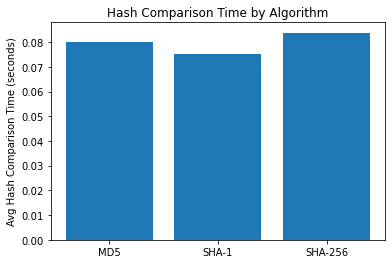

In [34]:
check_times_by_algo = { "MD5" : sum(check_time_3_symbol_md5) / N,
                        "SHA-1" : sum(check_time_3_symbol_sha1) / N,
                        "SHA-256" : sum(check_time_3_symbol_sha256) / N}

## Producing a bar chart plotting average times
plt.bar(check_times_by_algo.keys(), 
        check_times_by_algo.values())
plt.ylabel("Avg Hash Comparison Time (seconds)")
plt.title("Hash Comparison Time by Algorithm")

### Excercise 2.9 - Proof of Work
#### Write a program that feeds a counter into SHA-256, taking the output hash and converting it to an integer. Repeat until a hash is found that is less than a target number. To make this more like blockchain, include some aribtrary bytes to be combined with the counter.

In [35]:
import json

In [36]:
# It looks like the authors use the following 
# format to produce their hash: SHA256(b"MESSAGE:NONCE")
print(hashlib.sha256(b"Hello, Blockchain!:5").hexdigest())
print(int(hashlib.sha256(b"Hello, Blockchain!:1030399").hexdigest(), 16))

b366873e9261b5a72b642dad804bfbd00cd30e69fa85a0a9ae4d4ca5f8889990
60630542086736308255354717301224581094509218710954336401335758829119250


Sorry, 'Alice Sends Bob 1,000,000 Bitcoin' is not a valid transaction. No cheating!
 Successfully published to the blockchain: 
 Nonce=1,400,984,832 
 hash=5faafa6d983196fdaa667cf66dd5a4f3c52389099254efc0bc4eefa279995b40


Text(0.5, 0, 'Target Number (2**Target Number Power)')

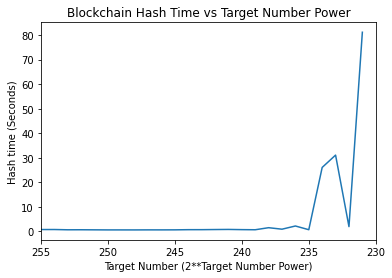

In [37]:
# This function simulates mining for bitcoin by
# generating a list of nonces tied to a message
# (or transaction). In this instance, Alice needs
# to send Bob 8 bitcoin. Any deviation from this 
# transaction will result in a failure to publish 
# the block to the blockchain
def proof_of_work(target_number=2**255, message="Alice Sends Bob 8 Bitcoin", true_message="Alice Sends Bob 8 Bitcoin"):

    # Generate a list of nonces by picking a million 
    # random numbers. Duplicate randoms might cause 
    # issues but this could be solved by using a different
    # datatype than the 32-bit integer and increasing the 
    # high value for nonces
    nonces = np.random.randint(low=0, high=2**31, size=100_000_000)
    
    # For each nonce in our list of random nonces
    for nonce in nonces:
        
        # Generate the block to add to the blockchain
        # by following the format "MESSAGE:NONCE", encode
        # that string as bytes
        block = f"{message}:{nonce}".encode('utf-8')
        
        # Hash the block using SHA-256
        block_hash = hashlib.sha256(block).hexdigest()
        
        # Convert that hashed block from base 16 
        # to base 10
        block_hash_value = int(block_hash, 16)
        
        if block_hash_value < target_number:
            
            # Check to see if the user is trying to publish
            # an invalid block to the blockchain
            if message != true_message:
                return f"Sorry, '{message}' is not a valid transaction. No cheating!"
            
            # Otherwise, they have successfully found another
            # block to add to the blockchain!
            else:
                return f" Successfully published to the blockchain: \n Nonce={nonce:,} \n hash={block_hash}"
            

# Try and cheat the system
print(proof_of_work(message="Alice Sends Bob 1,000,000 Bitcoin"))

# Play by the rules on a VERY easy mining
# difficulty
print(proof_of_work(message="Alice Sends Bob 8 Bitcoin"))

## See how the difficulty increases with 
## decreasing powers of target number
#time_to_find_block = {}
#target_num_bit_size = 256
#
#for i in range(1, 25+1):
#    power = target_num_bit_size - i
#    target_number = 2 ** (power)
#    print(f"Target Number: 2**{power}")
#    
#    # Track the amount of time it takes to 
#    # find a hash below the target number 
#    # at each power of two.
#    start = time.time()
#    print(proof_of_work(target_number=target_number, message="Alice Sends Bob 8 Bitcoin"))
#    end = time.time()
#    time_to_find_block[power] = end-start
#    
## Save this data as a JSON file so we 
## don't need to keep generating the info
## over and over again
#with open('./data/proof_of_work.json', 'w') as f:
#    json.dump(time_to_find_block, f)
    
# Load the data created from generating blocks of 
# varying difficulty 
with open('./data/proof_of_work.json', 'r') as f:
    time_to_find_block = json.load(f)
    
target_number_powers = [int(power) for power in time_to_find_block.keys()]
plt.plot(target_number_powers, time_to_find_block.values())
# Force the plot to count backwards 
# from 255
plt.xlim(255, 230)

# Add titles to chart
plt.title("Blockchain Hash Time vs Target Number Power")
plt.ylabel("Hash time (Seconds)")
plt.xlabel('Target Number (2**Target Number Power)')

#### Looks like we got very lucky with our nonce at the end there and selected a valid block VERY quickly. Overall it looks like a general trend of getting exponentially harder as the target number decreases by a factor of 2 (halves).

# Chapter 3 - Symmetric Encryption: Two Sides, One Key

In [38]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

In [39]:
# Generate a random 16-byte number
key = os.urandom(16)
print(f"Randomly generated key: {key}")

Randomly generated key: b'v\x85\xd4\xc0\x0f<\xed\x0b\x89\x18i\x19\xcd\x0b\xebu'


### Exercise 3.1 - A Secret Message

#### Without looking at additional documentation (oops already read ahead earlier), try and figure out how the aes encryptor and decryptor's update function works.

In [40]:
# Build a cipher with an encryptor and decryptor
# using the random key we generated above
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

In [41]:
# Start with a secret message. This changed
# the output before and after being encrypted
# / decrypted but after runnint it multiple 
# times I don't see any additional change
aesEncryptor.update(b"a secret message")
aesDecryptor.update(b"a secret message")

b'k\xa0!\xaf\xb9\xb4{<\x03\\\x93\x9a\x85\x1dG|'

In [42]:
# The output is now an empty string...?
aesEncryptor.update(b"another message")
aesDecryptor.update(b"another message")

b''

In [43]:
# Now the output is twice as long
aesEncryptor.update(b"another message again")
aesDecryptor.update(b"another message again")

b'6\xc2OYO\xd5\xcbb\xbc1\xc2\xd0\xd7\x1e8,:\xfe\xee\xb1\xf2Z\x9d\xd2u#\x07l\xe23jo'

In [44]:
# Again, empty string output
aesEncryptor.update(b"a")
aesDecryptor.update(b"a")

b''

In [45]:
# Build a cipher with an encryptor and decryptor
# using the random key we generated above
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

# Looks like the "update(_)" for the decryptor
# function doesn't work as well as using 
# the finalize function
ct = aesEncryptor.update(b"a secret message") 
ct += aesEncryptor.finalize()
aesDecryptor.update(ct) + aesDecryptor.finalize()

b'a secret message'

It looks like the output depends on the byte size of the input. If the byte size of the input is below a certain threshold, the message will not be encrypted. According to the authors the update function only works on 16 bytes at a time. Calling anything less than 16 bytes will produce the empty string result. Additionally results will only be displayed 16 bytes at a time. If there was a 27-byte output, only the first 16 bytes of information would be displayed.

In [46]:
# Author's key to follow along
key = b"\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83"

# Refresh cipher
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

# Encrypt with messages from the book
aesEncryptor.update(b"alice")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")

b'\xe7\xf9\x19\xe3!\x1d\x17\x9f\x80\x9d\xf5\xa2\xbaTi\xb2'

In [47]:
# Decrypt the cipher. For some reason
# this doesn't work if it's done in the
# same cell. Notice that the last "b" is
# cut off. This must be because that's where
# the 16-byte block ended.
aesDecryptor.update(_)

b'alicebobbobbobbo'

### Exercise 3.2 - Updated Technology

#### Upgrade the Ceaser Cipher application from chapter 1 to use AES. Instead of specifying a ***shift value*** figure out how to get ***keys*** in and out of the program. You will also need to deal with the 16-byte message issue.

In [48]:
# Find out how many bytes a given string object
# is so that I can pad the encoder to always reach
# a 16-byte block
import sys
msg = b"Hello World"
while sys.getsizeof(msg) % 16:
    msg += b"."
    
print(f"Message Size (bytes): {sys.getsizeof(msg)}")
print(f"Message: {msg}")

Message Size (bytes): 48
Message: b'Hello World....'


In [49]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

In [50]:
### Import functions from Exercise 1.1 as methods ###
### in the new easy to use AESEncrypt class.      ###
#
# Accomplished with reference to 
# https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/

### Warning - This code is NOT secure!!! According to Listing 3-7,
### a secure encryption class must use a different initialization
### vector (IV) and key for each different message.
class AESEncrypt():
    
    # Initialize the encryptor
    def __init__(self, num_bytes=16, key=None):
        
        if key:
            # Set to user-specified key
            self.key = key
        else:
            # Generate a random key of N-bytes
            self.key = os.urandom(num_bytes)
        
        # Generate a new cipher based on that key
        self.aesCipher = Cipher(algorithms.AES(self.key),
                                modes.ECB(),
                                backend=default_backend())
        self.aesEncryptor = aesCipher.encryptor()
        self.aesDecryptor = aesCipher.decryptor()
        
    ### Get keys in and out of the program ###
    def get_key(self):
        return self.key
    
    # Set a new key for the cipher, 
    # decode the old message
    # generate a new cipher,
    # encode the old message into the new cipher
    def set_key(self, new_key):
        # Set a new key for the cipher
        self.key = new_key
        
        # Decode the old message from the cipher
        old_msg = self.decode(self.aesCipher)
        
        # Generate a new cipher based on that key
        self.aesCipher = Cipher(algorithms.AES(self.key),
                                modes.ECB(),
                                backend=default_backend())
        self.aesEncryptor = aesCipher.encryptor()
        self.aesDecryptor = aesCipher.decryptor()
        
        # Encode the old message into the new cipher
        self.encode(self.aesCipher, old_msg)
         
    # Use a function to encode the user's message
    def encode(self, msg):
        # Pad the message with dots to fill the 
        # block. This will force every message 
        # encoded to be an appropriate length
        # when decoding.
        msg += b"." * (-len(msg) % 16) # Neat line for padding with '.' from pg 65
        self.encrypted_msg = self.aesEncryptor.update(msg)
        
    # Use a function to decode the user's message
    def decode(self):
        # decrypt the entire message
        self.decrypted_msg = self.aesDecryptor.update(self.encrypted_msg) + self.aesDecryptor.finalize()
        return self.decrypted_msg.decode("utf-8")
        
encryptor = AESEncrypt(key=b"\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83")
print(f"Key: {encryptor.get_key()}")
encryptor.encode(b"""I said hey, what's going on,\nand i said,\nyeah yeah yeah yeah yeah,\nyeah yeah yeah,\ni said hey,\nwhat's going on""")
print(str(encryptor.decode()))

Key: b'\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83'
I said hey, what's going on,
and i said,
yeah yeah yeah yeah yeah,
yeah yeah yeah,
i said hey,
what's going on..


### Exercise 3.3 - History Lesson
DES stands for Data Encryption Standard. DES is a symmetric-key encryption algorithm with a key size of 56 bits (weird that it's not a power of 2...?) and a block size of 64 bits (8 bytes). DES is has been superseeded by AES because it is vunerable to brute force attacks due to its smaller key size. 3DES (or Triple DES) strengthened this approach by tripling the key size.

##### Accomplished wrt 
https://en.wikipedia.org/wiki/Data_Encryption_Standard, 
https://en.wikipedia.org/wiki/Triple_DES

### Exercise 3.4 - Other Ciphers
RC4 (Rivest Cipher 4) is a stream cipher used in the TLS protocol that secures communications over computer networks as well as the WEP encryption used within 802.11 wireless networks. Unfortunately, RC4 is suceptible to a number of attacks. For example Fluhrer, Mantin and Shamir found in 2001 that the first few bytes of the output stream were strongly non-random. If analyzing enough messages, this permanent key could be discovered, leaking significant information about the key.

Twofish was a contestent to become the AES but Rijndael won because it was faster with 128-bit keys. Twofish is a highly flexible algorithm that allows for performance tradeoffs with "...several layers of performance trade offs, depending on the importance of encryption speed, memory usage, hardware gate count, key setup and other parameters". Twofish was never patented and is now in the public domain.
##### Accomplished wrt
#### https://en.wikipedia.org/wiki/RC4#Fluhrer,_Mantin_and_Shamir_attack, https://en.wikipedia.org/wiki/Twofish

### Exercise 3.5. All Nist Kats

#### Validate your AES library on a couple of ECB Test files

In [51]:
# This function takes an rsp file as input and
# outputs a dataframe of the rsp's key, plaintext,
# and ciphertext.
def read_kats(f):
    # Load in data from the rsp file
    file_data = pd.read_csv(f, dtype=str).values
    
    # Separate elements into components we want
    # to use for testing 
    composite_components = {"KEY": [], "IV": [], "PLAINTEXT": [], "EXPECTED_CIPHERTEXT": []}
    
    # Separate the data line by line
    for row in file_data:
        row_data, = row
        if "KEY" in row_data:
            composite_components['KEY'] += [remove_prefix(row_data)]
        elif "PLAINTEXT" in row_data:
            composite_components['PLAINTEXT'] += [remove_prefix(row_data)] 
        elif "CIPHERTEXT" in row_data:
            composite_components["EXPECTED_CIPHERTEXT"] += [remove_prefix(row_data)]    
        elif "IV" in row_data:
            composite_components['IV'] += [remove_prefix(row_data)]
    
    # If there is no IV parameter, fill that
    # column with null values
    if len(composite_components['IV']) == 0:
        composite_components['IV'] += ['' for _ in range(len(composite_components['KEY']))]
    
    # Convert from dictionary to a dataframe
    # of different test cases
    return pd.DataFrame(composite_components)

# This is a helper function to read_kats, 
# removes the data found before the equals 
# sign of the string
def remove_prefix(s):
    return s.split('= ')[1]

# This function applies the cipher to a 
# given plaintext input and outputs an
# encrypted text. Function heavily borrows
# from author's Listing 3-2. AES ECB KATs
def encrypt_plaintext(plaintext, key, nonce):
    # Encode the key as bytes instead of hex
    test_key = bytes.fromhex(key)
    
    # Generate our cipher based on the byte-encoded 
    # input key
    aesCipher = Cipher(algorithms.AES(test_key),
                   modes.ECB(),
                   backend=default_backend())
    aesEncryptor = aesCipher.encryptor()
    aesDecryptor = aesCipher.decryptor()
    
    # If plaintext is a one-character string
    # convert to bytes directly
    if len(plaintext) == 1:
        plaintext_bytes = bytes(plaintext, 'utf-8')
    else:
        # Convert plaintext from hex to bytes
        plaintext_bytes = bytes.fromhex(plaintext)
    # Encrypt the bytes
    ciphertext_bytes = aesEncryptor.update(plaintext_bytes)
    # Convert the encryption back into hex and
    # return as the function output
    return ciphertext_bytes.hex()

# Collect a list of all rsp files
# to read in
fpath = 'data/KAT_AES'
all_aes_encryption_tests = os.listdir('data/KAT_AES')
all_tests = []

# Read in all rsp files and combine 
# into one composite dataframe
for test in all_aes_encryption_tests:
    if '.rsp' in test:
        df = read_kats(f'{fpath}/{test}')
        df['TEST_FILE'] = test
        all_tests.append(df)
test_df = pd.concat(all_tests)

# Re-order the columns
test_df = test_df[['TEST_FILE', 'KEY', 'IV', 'PLAINTEXT', 'EXPECTED_CIPHERTEXT']]

# Encrypt each test case
test_df['GENERATED_CIPHERTEXT'] = test_df.apply(lambda row: encrypt_plaintext(row['PLAINTEXT'], row['KEY'], row['IV']), axis=1)

# Determine whether the generated ciphertext
# matches the expected ciphertext
test_df['PASS'] = test_df['GENERATED_CIPHERTEXT'] == test_df['EXPECTED_CIPHERTEXT']

# Display results
test_df

TEST_FILE                                                KEY  \
0    CBCGFSbox128.rsp                   00000000000000000000000000000000   
1    CBCGFSbox128.rsp                   00000000000000000000000000000000   
2    CBCGFSbox128.rsp                   00000000000000000000000000000000   
3    CBCGFSbox128.rsp                   00000000000000000000000000000000   
4    CBCGFSbox128.rsp                   00000000000000000000000000000000   
..                ...                                                ...   
251  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
252  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
253  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
254  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
255  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   

                                   IV                         PLAINTEXT  \
0    00000000000000000000000000000000  f34481ec3cc627bacd5dc3fb08f273e6   
1    00000000000000000000000000000000  9798c4640bad75c7c3227db910174e72   
2    00000000000000000000000000000000  96ab5c2ff612d9dfaae8c31f30c42168   
3    00000000000000000000000000000000  6a118a874519e64e9963798a503f1d35   
4    00000000000000000000000000000000  cb9fceec81286ca3e989bd979b0cb284   
..                                ...                               ...   
251  fffffffffffffffffffffffffffffff0  00000000000000000000000000000000   
252  fffffffffffffffffffffffffffffff8  00000000000000000000000000000000   
253  fffffffffffffffffffffffffffffffc  00000000000000000000000000000000   
254  fffffffffffffffffffffffffffffffe  00000000000000000000000000000000   
255  ffffffffffffffffffffffffffffffff  00000000000000000000000000000000   

                  EXPECTED_CIPHERTEXT              GENERATED_CIPHERTEXT   PASS  
0    0336763e966d92595a567cc9ce537f5e  0336763e966d92595a567cc9ce537f5e   True  
1    a9a1631bf4996954ebc093957b234589  a9a1631bf4996954ebc093957b234589   True  
2    ff4f8391a6a40ca5b25d23bedd44a597  ff4f8391a6a40ca5b25d23bedd44a597   True  
3    dc43be40be0e53712f7e2bf5ca707209  dc43be40be0e53712f7e2bf5ca707209   True  
4    92beedab1895a94faa69b632e5cc47ce  92beedab1895a94faa69b632e5cc47ce   True  
..                                ...                               ...    ...  
251  7240e524bc51d8c4d440b1be55d1062c  dc95c078a2408989ad48a21492842087  False  
252  da63039d38cb4612b2dc36ba26684b93  dc95c078a2408989ad48a21492842087  False  
253  0f59cb5a4b522e2ac56c1a64f558ad9a  dc95c078a2408989ad48a21492842087  False  
254  7bfe9d876c6d63c1d035da8fe21c409d  dc95c078a2408989ad48a21492842087  False  
255  acdace8078a32b1a182bfa4987ca1347  dc95c078a2408989ad48a21492842087  False  

[12468 rows x 7 columns]

In [52]:
# There is a parameter called "IV" that stands
# for initialization vector. Not sure how to use
# one yet (I think it's essentially a nonce) but
# this method works for all direct non-IV encryptions
print("NON-IV TESTS PASSED:")
test_df[(test_df['IV'] == '') & (test_df['PASS'] == True)]

NON-IV TESTS PASSED:


TEST_FILE                                                KEY IV  \
0    ECBGFSbox128.rsp                   00000000000000000000000000000000      
1    ECBGFSbox128.rsp                   00000000000000000000000000000000      
2    ECBGFSbox128.rsp                   00000000000000000000000000000000      
3    ECBGFSbox128.rsp                   00000000000000000000000000000000      
4    ECBGFSbox128.rsp                   00000000000000000000000000000000      
..                ...                                                ... ..   
251  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
252  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
253  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
254  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
255  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      

                            PLAINTEXT               EXPECTED_CIPHERTEXT  \
0    f34481ec3cc627bacd5dc3fb08f273e6  0336763e966d92595a567cc9ce537f5e   
1    9798c4640bad75c7c3227db910174e72  a9a1631bf4996954ebc093957b234589   
2    96ab5c2ff612d9dfaae8c31f30c42168  ff4f8391a6a40ca5b25d23bedd44a597   
3    6a118a874519e64e9963798a503f1d35  dc43be40be0e53712f7e2bf5ca707209   
4    cb9fceec81286ca3e989bd979b0cb284  92beedab1895a94faa69b632e5cc47ce   
..                                ...                               ...   
251  fffffffffffffffffffffffffffffff0  7240e524bc51d8c4d440b1be55d1062c   
252  fffffffffffffffffffffffffffffff8  da63039d38cb4612b2dc36ba26684b93   
253  fffffffffffffffffffffffffffffffc  0f59cb5a4b522e2ac56c1a64f558ad9a   
254  fffffffffffffffffffffffffffffffe  7bfe9d876c6d63c1d035da8fe21c409d   
255  ffffffffffffffffffffffffffffffff  acdace8078a32b1a182bfa4987ca1347   

                 GENERATED_CIPHERTEXT  PASS  
0    0336763e966d92595a567cc9ce537f5e  True  
1    a9a1631bf4996954ebc093957b234589  True  
2    ff4f8391a6a40ca5b25d23bedd44a597  True  
3    dc43be40be0e53712f7e2bf5ca707209  True  
4    92beedab1895a94faa69b632e5cc47ce  True  
..                                ...   ...  
251  7240e524bc51d8c4d440b1be55d1062c  True  
252  da63039d38cb4612b2dc36ba26684b93  True  
253  0f59cb5a4b522e2ac56c1a64f558ad9a  True  
254  7bfe9d876c6d63c1d035da8fe21c409d  True  
255  acdace8078a32b1a182bfa4987ca1347  True  

[2078 rows x 7 columns]

In [53]:
print("NON-IV TESTS FAILED:")
test_df[(test_df['IV'].isna()) & (test_df['PASS'] == False)]

NON-IV TESTS FAILED:


Empty DataFrame
Columns: [TEST_FILE, KEY, IV, PLAINTEXT, EXPECTED_CIPHERTEXT, GENERATED_CIPHERTEXT, PASS]
Index: []

Not sure how to apply the IV (initialization vector/nonce) Parameter. I know that it is a random number (in fact, nonce stands for number used only once) and it is added to the key so that a file's encrypted hash is not recognizable. This reminds me of when the MD5 hash of "password" was easily recognizable when no salt was used. Might need to come back to this one and apply the IV to encryption to pass all the test cases.

### Exercise 3.6 - Sending Bob a Message
#### Using your AES encryptor from the beginning of the chapter, create a couple of messages between alice and bob. Make sure to correctly encrypt and decrypt the mesage.

In [54]:
### Deciding to automate the formatting
### for generating these messages
# Message Parameters
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-01'
location = 'the docks'
time = '2300'

# Message format
rendez_vous = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}\n"""

print("---ORIGINAL MESSAGE---")
print(rendez_vous)
# Message encryption
encryptor = AESEncrypt()
print(f"Key: {encryptor.get_key()}\n")
# Encode our message into bytes and encrypt
encryptor.encode(bytes(rendez_vous, 'utf-8'))
print("---ENCRYPTED MESSAGE---")
print(encryptor.encrypted_msg)
print()

# Decode our message
print("---DECRYPTED MESSAGE---")
print(encryptor.decode())

---ORIGINAL MESSAGE---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300

Key: b'\xc6\xf5\xf9\x0f9*\xe3\xa5\x00bx\x82\xdb\xaf`\x08'

---ENCRYPTED MESSAGE---
b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"

---DECRYPTED MESSAGE---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300
....


Why are many encrypted 16-byte message blocks identical?

**My answer:** When looking at the ciphertext outputs of different messages side by side, it looks like the ciphertext outputs of the two different messages have exactly the same encrypted output UNITL the 5th block. Once the 5th block is reached, different messages produce different ciphertexts. This could be because all characters encrypted in a given block share the same ciphertext output and once block 5 was reached the number of bytes within the messages became misalligned, causing a shift to occur.

#### True Answer: Since much of the header will remain the same between different messages using the 'rendez_vous' format above, much of the output will also be the same.

### Exercise 3.7 - Sending Bob a Fake Message (SKIPPED)
#### Take two different ciphertexts from Alice to Bob with different meeting instructions on different dates. Splice the ciphertext from the body of the first message into the body of the second. Does the message decrypt? Do you change where bob goes to meet Alice?
#### For some reason the byte-encoded solution 

#### Create messages for Alice and Bob

In [55]:
### MESSAGE 1 ###
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-01'
location = 'the docks'
time = '2300'
rendez_vous1 = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}\n"""

### MESSAGE 2 ###
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-02'
location = 'the ambush'
time = '2300'
rendez_vous2 = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}"""
print("---Meeting 1---")
print(rendez_vous1)
print()
print("---Meeting 2---")
print(rendez_vous2)

---Meeting 1---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300


---Meeting 2---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-02
Meet me today at the ambush at 2300


#### Encrypt messages between Alice and Bob

In [56]:
# Create ciphers for two different messages between
# Alice and Bob
encryptor_msg1 = AESEncrypt(key=b'\xc2\x1d\x8eG\xb1D\xbd\xcbN\xe8\x15\x00e\x7f\xdd\xb1')
encryptor_msg2 = AESEncrypt(key=b'\xc2\x1d\x8eG\xb1D\xbd\xcbN\xe8\x15\x00e\x7f\xdd\xb1')
print(f"Key: {encryptor.get_key()}\n")

# Encode our message into bytes and encrypt
encryptor_msg1.encode(bytes(rendez_vous1, 'utf-8'))
encryptor_msg2.encode(bytes(rendez_vous2, 'utf-8'))

print("Encrypted messages look VERY similar:")
print()
print("---ENCRYPTED MESSAGE 1---")
print(encryptor_msg1.encrypted_msg)
print()

print("---ENCRYPTED MESSAGE 2---")
print(encryptor_msg2.encrypted_msg)
print()

Key: b'\xc6\xf5\xf9\x0f9*\xe3\xa5\x00bx\x82\xdb\xaf`\x08'

Encrypted messages look VERY similar:

---ENCRYPTED MESSAGE 1---
b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"

---ENCRYPTED MESSAGE 2---
b'\x19\xaa\'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk\xa3\x98\x0e6\x0c\xea\x90"\xc6\xe1\x8b\x8e\x0f\x0b\x9f\x9e\xdf\xe0\xed\xc51;\x7f\xdcA\xe1\xbejk\xfa\x90[}\x9eZ\xab\xc9\x86{\x9a\xef~_\x8a\xb7\x90"\xd4'



#### Mix and Match blocks of the encrypted messages to form a new message (attempting to interfere with this system's integrity). Unfortunately it looks like the encrypted output has some errors being UTF-8 decoded for some reason so I'm going to move on.

In [57]:
# Use a function to decode the user's message
def decode(encryptor, string_length):
    # finalize the composite input
    print(string_length,encryptor.encrypted_msg.decode("utf-16"))
    
    # decrypt the entire message
    encryptor.decrypted_msg = encryptor.aesDecryptor.update(encryptor.encrypted_msg) + encryptor.aesDecryptor.finalize()
    return encryptor.decrypted_msg.decode("utf-8")

#decode(encryptor_msg1, 112-32)

In [58]:
ciphertext = b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"
ciphertext.decode('utf-8', 'ignore')

"\x19'ڣe`\x13HBq_@Ӌ\tK(kEF~ç\x0fB\U0004a901k\x06p\x13$,\x1fJ\tAv,\x7fk$\x1e7=j\x18k2+Tj\x1dl\rj\x1af]DO؟Іazq5y(>n"

#### Listing 3-4; AES Exercise Example

In [59]:
ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/encrypted_image_ebc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        writer.write(header + aesEncryptor.update(body))

### Input Image

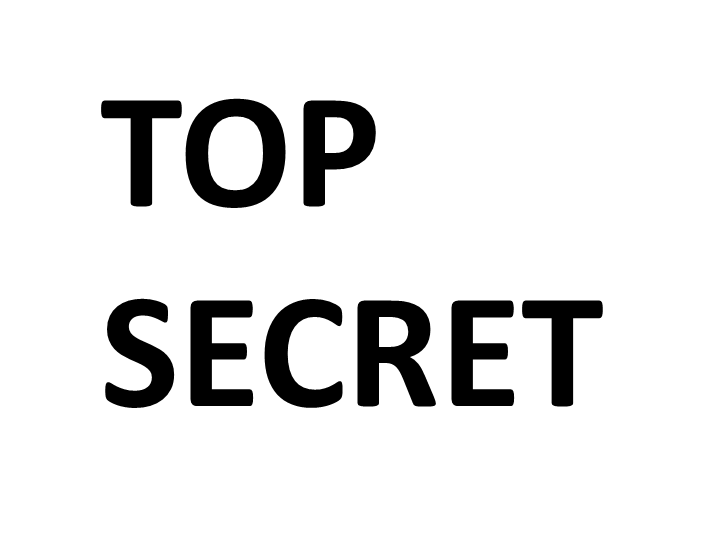

### EBC Encrypted Image

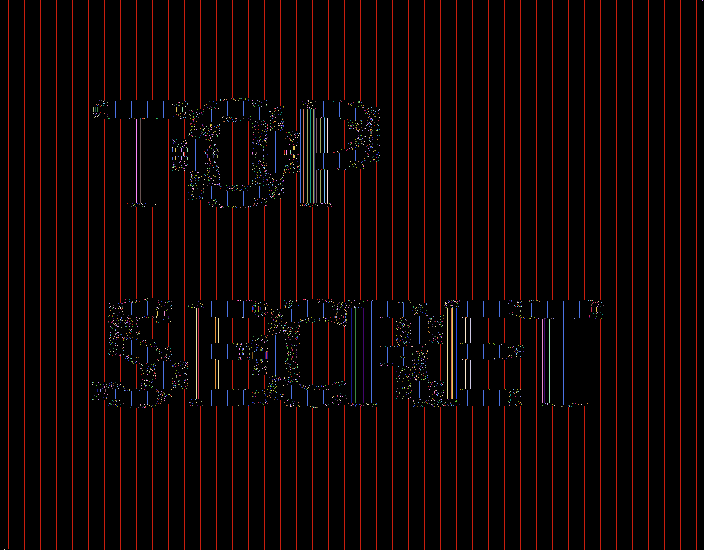

### Exercise 3.8 - XOR Exercise
#### When we encrypt with EBC, encrypted blocks are repeated and easily recognizble. Even when one block is changed, the remaining blocks stay the same. To change the remaining blocks to a scrambled encrypted format, the XOR gate can be used on the subsequent blocks.

In [60]:
# Python uses ^ for the XOR operation.
print(f"5^9 = {5^9}")
print(f"12^9 = {12^9}")
print(f"12^5 = {12^5}")

5^9 = 12
12^9 = 5
12^5 = 9


In [61]:
## Truth table
print("XOR Truth Table")
print()
print(f"0^0 = {0^0}")
print(f"0^1 = {0^1}")
print(f"1^0 = {1^0}")
print(f"1^1 = {1^1}")

XOR Truth Table

0^0 = 0
0^1 = 1
1^0 = 1
1^1 = 0


### Exercise 3.9 - The Mask of XOR-O?
#### Create 16 bytes of plaintext and 16 random characters. Manually XOR each plaintext byte with each random byte. What does the output look like? Then, XOR the output with the random bytes again. What does the output look like now?

In [62]:
import binascii

In [63]:
### Create maskedtext string to scramble
### the output
plaintext = b"sixteen bytes of pure plaintext."
randomtext = bytes(binascii.hexlify(os.urandom(16)).decode(), "utf-8")
    
# XOR integer values of plaintext and randomtext
# character by character. Then convert back to string
# and add them to the maskedtext string
XOR_output = [(plaintext[i] ^ randomtext[i]) for i in range(32)]

# Create a function that can go from 
# bytes to string
def convert_to_str(integer_input):
    return integer_input.to_bytes(2, byteorder='big').decode()

# Convert the XORd output to a string
for integer in XOR_output: print(convert_to_str(integer))

 F

 J
 
 
 
 
 
 [
 K
 B
 
 D
 
 Z
 
 A
 
 E
 
 \
 A
 
 
 
 ]
 

 L
 
 K
 A
 L


In [64]:
# Now XOR the output with the randomtext again 
double_XOR_output = [(XOR_output[i] ^ randomtext[i]) for i in range(32)]

# And display each element of the string
for val in double_XOR_output: print(convert_to_str(val))

 s
 i
 x
 t
 e
 e
 n
  
 b
 y
 t
 e
 s
  
 o
 f
  
 p
 u
 r
 e
  
 p
 l
 a
 i
 n
 t
 e
 x
 t
 .


XORing the input text with random text creates a completely scrambled output ( a process called "munging"). Then, re-XORing the scrambled output with the random text returns us to the original input.

### Exercise 3.10 - Deterministic Output
#### Run the same inputs through AES-CBC using the same key and IV (you can use Listing 3-7 as a starting point). Make the inputs the same each time and print the corresponding ciphertexts. What do you notice?

In [65]:
from cryptography.hazmat.primitives import padding

In [66]:
### Listing 3-7
class EncryptionManager:
    def __init__(self):
        self.key = os.urandom(32)
        self.iv = os.urandom(16) 
        
    def encrypt_message(self, message):
        # WARNING: This code is NOT secure!!
        encryptor = Cipher(algorithms.AES(self.key),
                           modes.CBC(self.iv),
                           backend=default_backend()).encryptor()
        
        padder = padding.PKCS7(128).padder()
        padded_message = padder.update(message)
        padded_message += padder.finalize()
        ciphertext = encryptor.update(padded_message)
        ciphertext += encryptor.finalize()
        return ciphertext
    
    def decrypt_message(self, ciphertext):
        # WARNING: This code is NOT secure!!
        decryptor = Cipher(algorithms.AES(self.key),
                           modes.CBC(self.iv),
                           backend=default_backend()).decryptor()
        unpadder = padding.PKCS7(128).unpadder()
        
        padded_message = decryptor.update(ciphertext)
        padded_message += decryptor.finalize()
        message = unpadder.update(padded_message)
        message += unpadder.finalize()
        return message
    
manager = EncryptionManager()

messages = [
              b"This is my first input", 
              b"This is my second input",
              b"This is my third input",
            ]

ciphertexts = [manager.encrypt_message(m) for m in messages]

ciphertexts

[b'\xd0_\xb4\x1fvW\xfd\x1e\xa3hD\xaf\xbd\x91:\xeb\x00\xee\x16\xd7\x85?\x1b\x80\xb7 \xfaR]\xc9z\x04',
 b'x\xd2\xb1\xc3\xb4\xf9n|Ren\t\xb9\x7f\xc3 \x9a\xb3\x12?\xa82\x9a\x9f\xd4\x00\x047\xa5\x13\xe0C',
 b'|\xb9\xa3\x91\x0e\x12\x99\x12\xd3NBHd\xbd\xa1W\xd9\xb2 *\x82D\xadK\x9f\xeb\xf8\x03Q\x9f\xa4+']

In [67]:
print(manager.encrypt_message(messages[0]))
print(manager.encrypt_message(messages[1]))
print(manager.encrypt_message(messages[2]))

b'\xd0_\xb4\x1fvW\xfd\x1e\xa3hD\xaf\xbd\x91:\xeb\x00\xee\x16\xd7\x85?\x1b\x80\xb7 \xfaR]\xc9z\x04'
b'x\xd2\xb1\xc3\xb4\xf9n|Ren\t\xb9\x7f\xc3 \x9a\xb3\x12?\xa82\x9a\x9f\xd4\x00\x047\xa5\x13\xe0C'
b'|\xb9\xa3\x91\x0e\x12\x99\x12\xd3NBHd\xbd\xa1W\xd9\xb2 *\x82D\xadK\x9f\xeb\xf8\x03Q\x9f\xa4+'


The encrypted output message is exactly the same every time because we use the same key and IV for encryption. The whole point of the IV is to change every time a message is encrypted so that the ciphertext changes even with identical message input. 

### Exercise 3.11 - Encrypting an Image
#### Encrypt the image with CBC mode now instead of ECB mode. What does the image look like now?

In [68]:
aesCipher = Cipher(algorithms.AES(os.urandom(32)),
                   modes.CBC(os.urandom(16)),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/encrypted_image_cbc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        writer.write(header + aesEncryptor.update(body))

### CBC Encrypted Message:

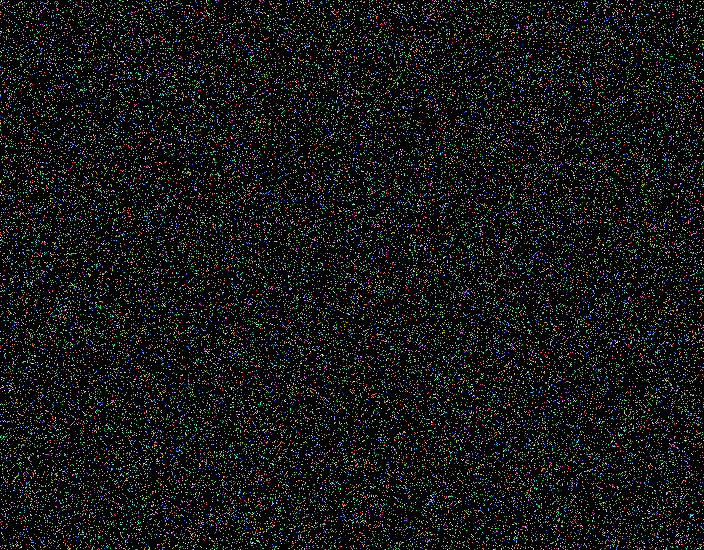

### Exercise 3.12 - Hand-Crafted CBC
#### ECB mode is just raw AES. You can create your own CBC mode using ECB as the building block (though you should always use tested libraries in production code). For this exercise, see if you can build a CBC encryption and decryption operation that is compatable with the cryptography library. For encryption, make sure to take the output of each block and XOR it with the plaintext of the next block before encryption. Reverse the process for decryption.

Might have to encode/decode one byte at a time just because of encoding/decoding issues.

In [69]:
# Come up with a witty top-secret-worthy string to test 
# my l337 CBC encryption skills
message_to_XOR = b"Baby's first CBC encryption. Oh boy do I love cryptography!"
print(f"Message to encrypt: '{message_to_XOR}'")

Message to encrypt: 'b"Baby's first CBC encryption. Oh boy do I love cryptography!"'


In [70]:
#########################################
############# XOR THE INPUT #############
#########################################

# Create two byte arrays to hold the bytes
# that we will encrypt
XOR_key, XOR_msg = bytearray(), bytearray()
for i, msg_char in enumerate(message_to_XOR):
    # Every 16 characters a new block starts.
    # Generate a random character to XOR our
    # input against for the first block
    if i < 16:
        # Create a random character and retrieve
        # its integer value using list unpacking
        random_char, *_ = os.urandom(1)
        # Append the random character to the 
        XOR_key.append(random_char)
        # Append the message character XOR'd with the
        # random character to the XOR'd message
        XOR_msg.append(random_char ^ msg_char)
        
    # New blocks start here. 
    # This is where we start to XOR the output
    # with the plaintext of the previous block.
    else:
        # Get the character from the previous block
        previous_block_plaintext = message_to_XOR[i-16]
        # Use that character to XOR against the current character
        XOR_key.append(previous_block_plaintext)
        XOR_msg.append(msg_char ^ previous_block_plaintext)
        
print("XOR'd Message:")
bytes(XOR_msg)

XOR'd Message:


b'\xd7\xdbc\xeb\xfd\x1cY:E\nl\x85\x12\r\xc8\x8cb\x04\x0c\x1aU\nP\x12\x00\x1d\x1dZ\x00\x0c*cB\n\x17C\x16\x16P=I\x03\x01XEo\x0bR\x1b\x1f\rO\x03\x1dA9H\x15N'

In [71]:
#########################################
################ ENCRYPT ################
#########################################
key = os.urandom(32)

# First, we bring in ECB AES encryption code with
# padding from listing 3-7
def encrypt_message(message, key=key):
    encryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    padder = padding.PKCS7(128).padder()
    padded_message = padder.update(message)
    padded_message += padder.finalize()
    ciphertext = encryptor.update(padded_message)
    ciphertext += encryptor.finalize()
    return ciphertext

# Now encrypt that scrambled XOR message
# by turning the byte array into bytes.
XOR_msg_to_encrypt = bytes(XOR_msg)

ciphertext = encrypt_message(XOR_msg_to_encrypt)

print("Encrypted Output:")
ciphertext

Encrypted Output:


b'\xf0\xe7\xc3G[`0\x88\x80-\xaf\n\x02\x08\xea\xbf?\xca\xad\xa0Y\xad\x0e\x91\x8c/k\x05\xdf\xfd\xe0P\xcd\xc4\x06\x14]3m\xf0[5\xdb\xfc\xc4Q\xb8\xdc\xdd0\xf8\xfdw\n) S\xd6\xec\x97u\x02\xee\xe9'

In [72]:
#########################################
################ DECRYPT ################
#########################################

# Then we bring in AES decryption code with
# padding from listing 3-7
def decrypt_message(ciphertext, key=key):
    decryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).decryptor()
    unpadder = padding.PKCS7(128).unpadder()
    padded_message = decryptor.update(ciphertext)
    padded_message += decryptor.finalize()
    message = unpadder.update(padded_message)
    message += unpadder.finalize()
    return message

# Now we decrypt our ciphertext
decrypted_msg = decrypt_message(ciphertext)
print("Decrypted Output:")
decrypted_msg

Decrypted Output:


b'\xd7\xdbc\xeb\xfd\x1cY:E\nl\x85\x12\r\xc8\x8cb\x04\x0c\x1aU\nP\x12\x00\x1d\x1dZ\x00\x0c*cB\n\x17C\x16\x16P=I\x03\x01XEo\x0bR\x1b\x1f\rO\x03\x1dA9H\x15N'

In [73]:
#########################################
############ XOR THE OUTPUT #############
#########################################

# The above output looks oddly familiar!
# Now we can use the XOR_key we stored to
# Re-XOR the decrypted message byte (b) by 
# byte and return our original message
chars = []
for i, b in enumerate(bytearray(decrypted_msg)):
    restored_char = b^XOR_key[i]
    restored_char_str = restored_char.to_bytes(2, 'big').decode('utf-8')
    chars.append(restored_char_str)

print(f"Your secret message was : '{''.join(chars)}'")

Your secret message was : ' B a b y ' s   f i r s t   C B C   e n c r y p t i o n .   O h   b o y   d o   I   l o v e   c r y p t o g r a p h y !'


### Exercise 3.13 - Write a Simple Counter Mode
#### Create counter mode encryption from ECB mode. Generate the key stream by taking the IV block and encrypting it, then increasing the value of the IV block by one to generate the next block of the keystream material. When finished, XOR the key stream with the plaintext. Decrypt in the same manner.

In [74]:
# Select a very serious message to 
# encrypt using CTR (counter) encryption
msg = b"Howdeee doo I'm counting"

# Create a random initialization vector (IV)
# block to kick off our counter, then encrypt
# it using AES ECB encryption
iv_block = os.urandom(16)
iv_block_value = int.from_bytes(iv_block, byteorder='big') 

# Bring in AES encryption code WITHOUT
# padding from listing 3-7
def encrypt_message(message, key=key):
    encryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    ciphertext = encryptor.update(message)
    ciphertext += encryptor.finalize()
    return ciphertext

# Create a key for AES ECB encryption
key = os.urandom(32)

# Generate as many blocks as we need to 
# XOR against our plaintext
key_stream = b""
print("Generating key stream...\n")
while len(key_stream) <= len(msg):
    # Encrypt the IV block using ECB encryption
    encrypted_iv_block = encrypt_message(iv_block)
    
    ### Display the results ###
    print(f"IV block value:      {iv_block_value}")
    print(f"IV block:            {iv_block}")
    print(f"Encrypted IV block:  {encrypted_iv_block}\n")
    
    ### Update the counter ###
    # Add this block to our "encrypted_blocks"
    key_stream += encrypted_iv_block
    # Update our IV value by counting up by one
    iv_block_value += 1
    # Convert this new IV block value back into bytes
    iv_block = iv_block_value.to_bytes(length=len(iv_block), byteorder='big')
    
print(f"Key stream: {key_stream}\n")

Generating key stream...

IV block value:      226829571480902055609650770525097064136
IV block:            b'\xaa\xa5\xc9Qm\xd9V\xd4v:[\xb3I\xf8v\xc8'
Encrypted IV block:  b'u#\x1f8%\x14E\xfb\x1e\xfd\xc1\xb5w\xebRL'

IV block value:      226829571480902055609650770525097064137
IV block:            b'\xaa\xa5\xc9Qm\xd9V\xd4v:[\xb3I\xf8v\xc9'
Encrypted IV block:  b'\r\r\xd6do%\x88Y&\xe9d\xa6\x17\xdd\xa5e'

Key stream: b'u#\x1f8%\x14E\xfb\x1e\xfd\xc1\xb5w\xebRL\r\r\xd6do%\x88Y&\xe9d\xa6\x17\xdd\xa5e'



In [75]:
### Use the keystream to encrypt and decrypt our message! ###
print(f"Message to encrypt: '{msg}'\n")

# XOR the input message with the key stream
ciphertext = bytearray((char ^ key_stream[i]) for i, char in enumerate(msg))
print(f"Ciphertext: {bytes(ciphertext)}")

# Re-XOR the ciphertext with the key stream to 
# return the original text
plaintext = bytearray((char ^ key_stream[i]) for i, char in enumerate(ciphertext))
print(f"Plaintext:  {bytes(plaintext)}")

Message to encrypt: 'b"Howdeee doo I'm counting"'

Ciphertext: b'=Lh\\@q \xdbz\x92\xae\x95>\xcc?lnb\xa3\n\x1bL\xe6>'
Plaintext:  b"Howdeee doo I'm counting"


In [76]:
# Conversion between bytes and integer values accomplished wrt
# https://stackoverflow.com/questions/59023249/convert-back-from-int-to-byte
iv_block_value = int.from_bytes(iv_block, byteorder='big') 
new_bytevalues = iv_block_value.to_bytes(length=len(iv_block), byteorder='big') 
print(new_bytevalues == iv_block) # prints True

True


### Exercise 3.14 - Parallel Counter Mode
#### Extend your counter mode implementation to use a thread pool to generate the key stream in parallel. Start by creating a function that can generate any particular block called "keystream(IV, i)". Next, parallelize the generation of a key stream up to n by dividing the counter sequence among independent processes any way you please and have them all work on generating their key stream blocks independently.

In [77]:
from concurrent.futures import ThreadPoolExecutor

In [78]:
# This function creates a parallelizable keystream.
# It takes an "initialization vector" (IV) or "Nonce" and
# returns an ECB encrypted block. Steps are as follows:
#
# 1) Add the IV to the integer i (IV + i),
# 2) Convert that integer value to bytes, then
# 3) ECB encrypt those bytes
def keystream(IV, i):
    # 1) Add the integer i to IV
    nonce = IV + i
    # 2) Convert integer value to bytes, specifying
    #    a 16 bit length
    bytes_to_encrypt = nonce.to_bytes(length=16, byteorder='big')
    # 3) ECB encrypt the new bytes and return the 
    #    encrypted output
    encryptor = Cipher(algorithms.AES(os.urandom(32)),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    ciphertext = encryptor.update(bytes_to_encrypt)
    ciphertext += encryptor.finalize()
    return ciphertext

# Determine the number of blocks we want to use 
# for our key stream
num_blocks = 10000
# Use a count up to the number of blocks for our
# index ("i") value
i = list(range(num_blocks))
# Create a random IV and retrieve its integer value,
# then make as many copies as number of blocks we need
# to generate
IV_value = int.from_bytes(os.urandom(16), byteorder='big')
IV = [IV_value for _ in range(num_blocks)]

# Parallell process the keystream
with ThreadPoolExecutor(max_workers=1) as executor:
    ciphertexts = executor.map(keystream, IV, i)
    
print(f"Number of Blocks: {num_blocks}")
print(f"Key stream: {b''.join(ciphertexts)}")

Number of Blocks: 10000
Key stream: b'\x13\xce\xd7\xd2\xbfM\x98m~\xc9\x82l.\xbb\xe2\x08\xe8\xbb\x9e\x84\xfb\xd5\xb5\xe1\x9d\x06\xc1l/\xbf\xd7\xd1\x1a76B\x1e\xcfp\xa5\x19\xdfS\xfc]\xcc\xfbEa\'_\xec\x026\x9c9\xe2\x1e\xf6\x19C\xb6\xe4JV\x96;\x06e\nC\xaa\xa4\x04\x9b`\x95\xbb\x01\x1ev\xf1Z\xfb\x9c\xa4\x1d\x91\xf9\xee\xfe/>\x9f\x0f\xb7\xe9i\xd3\xa5\x05\x07am4\xfbS\x06/UC\x01\x00\x8b\x85\xc3\x1b\xb1\x07G#KR\x94i\xc6Z\xb0;\xd5N>i,\xea~G:\x19\xa9\xc5\xaeS&=\xae\x96\xd2y_\xbbq\x85<r\xb2\x04\x0b\xc0\xad\xa5\xed\xcd*z6\xea\xf42x@\x1c\xb7\xf0\xf2\x96\x7f%\xeb\x91\xd6H\xe3 -\xe8D\xfd)G\xec\xe6?\x8c][RY\xa4\x9d&\xa5\x8c\x0e\xdbL\x82\xd0\xa7]\r\xef\x9d\xd1Qr\x9b\xc23\x06xSnd\xc9P^}\\\xcet\x0f\xd3\xe9\xc4\x1a\x81%\xf8\xb9\xe7V\xaaZ\xda/\xb5\xb9\x83/L\x99C\xbb\xa6\x9b\xbd5#\x80\x94G\xeat$\xd7\xc0A\xfe\x19\x13H\xfd\xc6\xc86\x07\xc7\xad\xe2\xef\xce\xe3*\xf6\x97\xa0\xce\x8a\x10\xd1\x01\xe4=O;\xc1\xcd \xfe\xe7[\xca\xc1qQ\xffr*\xc6\xe5O2\xdd\xd9V\xa6\xe45\x97L\x7f\xc9\x10\xb8\x12\xcaZ,\x99\xee]\x19\xe94\x85\

In [79]:
# Multithreading accomplished wrt
# https://docs.python.org/3/library/concurrent.futures.html

### Exercise 3.15 - Riding the Keystream
#### Put into practice this keystream stealing attack. Encrypt two different purchase messages using the same key and IV. "Intercept" one of the two messages and XOR the ciphertext contents with the known plaintext. This will give you the keystream. Next, XOR the keystream with the other message to recover that message's plaintext. The message sizes may be a little different, but if you're short some keystream bytes, recover what you can.

In [80]:
### Replicating the credit card purchase transfer
### discussed in Listing 3-10

# WARNING - Never do this. Reusing a key/IV is irresponsible.
# (The whole point of this exercise is to demonstrate why)
preshared_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')
preshared_iv = bytes.fromhex('00000000000000000000000000000000')

# This is the sale I made with my own credit card.
# All this information is known to me and will be used
# to decipher other transactions.
my_purchase = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>
"""

aesContext = Cipher(algorithms.AES(preshared_key),
                    modes.CTR(preshared_iv),
                    backend=default_backend())
encryptor = aesContext.encryptor()
keystream = encryptor.update(my_purchase)

print(f"My Original Purchase: {my_purchase.decode('utf-8')}")
print(f"Keystream generated:\n{keystream}\n")
# XOR the input message with the key stream
my_encrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(my_purchase))
print(f"My Purchase:\n{bytes(my_encrypted_purchase)}")

My Original Purchase: 
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>

Keystream generated:
b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf2\xa7n\xa6\xed\xd3I\x8aH\xf9\x9d^\x0e\xfex4\xf7\xaf\xbf\xf4$\x8d\xe8e\xcc\xcb\xfe\x96\x84\xd0\xe4\xa5\xe6\x96_\xcam\x7f\xc0\xe0D\x12f;\x9a)h\xc5|\xfdT\xba\xcc_cK+;\xbf\x10f\x9c\xfa\x1e\x8f5\x11\x1d\x95\xb5U\x1e\xcf\xd3\xca\xe7\x9au\xcay 8\xf2\xea\xef\x80\x06\xb85\x81C\xc0\x87,O\xb6\xdc\xd3\xdd\xf4\xf5\xcb\xa2\xe6\x8dZ\x045\xf9\x91\n\xb7[<\xc1agk\x9f\x07.\x8d\xba\x1b\xfa1KB\xd7\xf6b\x9a\x90k pV>\x93kx\x82n(\xcb\x00\xad\x08x\

In [81]:
# This is the sale I will try to steal.
vulnerable_purchase = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>123-456-789-123</CCNumber>
    </CreditCardPurchase>
</XML>
"""

print(f"Keystream generated:\n{keystream}\n")
# XOR the input message with the key stream. Add the caveat
# that now we can only go as far as the length of the 
# keystream of the known message.
vulnerable_encrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(vulnerable_purchase[:len(keystream)]))
print(f"Vulnerable Purchase:\n{bytes(vulnerable_encrypted_purchase)}\n")

# Use the keystream again to decrypt the message
vulnerable_decrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(vulnerable_encrypted_purchase))
print(f"Vulnerable Purchase:\n{bytes(vulnerable_decrypted_purchase).decode('utf-8')}")

Keystream generated:
b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf2\xa7n\xa6\xed\xd3I\x8aH\xf9\x9d^\x0e\xfex4\xf7\xaf\xbf\xf4$\x8d\xe8e\xcc\xcb\xfe\x96\x84\xd0\xe4\xa5\xe6\x96_\xcam\x7f\xc0\xe0D\x12f;\x9a)h\xc5|\xfdT\xba\xcc_cK+;\xbf\x10f\x9c\xfa\x1e\x8f5\x11\x1d\x95\xb5U\x1e\xcf\xd3\xca\xe7\x9au\xcay 8\xf2\xea\xef\x80\x06\xb85\x81C\xc0\x87,O\xb6\xdc\xd3\xdd\xf4\xf5\xcb\xa2\xe6\x8dZ\x045\xf9\x91\n\xb7[<\xc1agk\x9f\x07.\x8d\xba\x1b\xfa1KB\xd7\xf6b\x9a\x90k pV>\x93kx\x82n(\xcb\x00\xad\x08x\xefWB\x03\xb4Rq\xb2\x8ei\x17\x02\xe6"

Vulnerable Purchase:
b'\xfd\xe4\xfb\xaeJ\t\xe0 \xef\xf7"\x96\x9f\x83\x83+\x84\xd4\xc9\xc0\x8bOH(a\xe3\xa9\xc6\xc3[\xc4\xd9\x1d\xf9\'7E\x13\xbf\xd4\x9fCk\xd7?2R\x85\xda\xefO\xf7\xe1=F\xa6\xdb\xcb\x1c\x02NrS\x87\x06\xe8e\xb7\xa06-/\xc

Maybe this is the author's point, but it seems obvious to me now that if one has the keystream (or the ciphertext that the plaintext is XOR'd against) decrypting any other message is super easy. ESPECIALLY in counter mode, where I can generate the keystream indefinetly by adding one to the IV for each block. In my comment above the creation of the "vulnerable_encrypted_purchase" variable I mentioned that the keystream I was using could not decrypt the full vulnerable message (notice the missing </ XML>. This is because my purchase's plaintext is a little bit shorter than the vulnerable plaintext. If I really had the key/IV that was used throughout all transactions, I would likely create a dummy document that could be used to generate an arbitrarily long keystream that could be used to generate a message of any length.

In [82]:
print("Look at that! Two encrypted messages with pre-shared credentials XOR'd together gets us the keystream!!!")
bytearray((vuln_char ^ my_encrypted_purchase[i]) for i, vuln_char in enumerate(vulnerable_purchase[:len(my_encrypted_purchase)]))

Look at that! Two encrypted messages with pre-shared credentials XOR'd together gets us the keystream!!!


bytearray(b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08\'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf5\xa1e\xa3\xa8\xf9\x04\xaeS\xe4\xd2\x14p\xa4C$\xfc\xf4\xc7\xea\x0e\x8d\xe8e\xcc\xcb\xfe\x8a\xe0\x8d\xd4\xa1\xac\xc3P\xd5la\xdf\xe3[\x13n5\x8dQ&\xf5x\xb7;\xa4\xe6_cK+;\xbf\x0c\x07\xcd\xd4\x06\x8e4AM\x9a\xa1]\x04\xd3\xd3\xc6\xf8\xf5(\x950a\r\xa1\x8f\xba\xceR\xa6\x1f\x81C\xc0\x9bO,\xd8\x89\x82\xfc\xd2\xc9\x80\xfa\xb1\xdd\x05\x0f1\xfe\x8f\x12\xb6[\'\xd9cjn\x9du_\xf0\xf3Y\xdb\x17w\t\xb0\xb4\'\xc8\x8e]/\x13\x04{\xcb-O\xb3j>\xc6$\x9b\x1bi\xe3fD\x14\xe90,\xee\xb3\x1aQ\x00\xc3")

Well, almost the same keystream. This will show us exactly where the information between the two encrypted texts differ.

### Exercise 3.16 - Sifting Through XOR
#### XOR together some plaintext messages and look around for patterns and readable data.

In [83]:
# XORing identical text returns nothing
print("Identical Text:")
msg1 = b"The quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# Changing the first letter results in 
# changing the first byte from 
# \x00 to \x0e
print("\nFirst Letter Changed:")
msg1 = b"Zhe quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# Changing the first word results in 
# changing the first byte from 
# \x00 to \x0c1?. Also  output text seems 
# shorter
print("\nFirst Word Changed:")
msg1 = b"XYZ quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# It looks like all subsequent letters are changed.
# Let's try out the strict formatting of the credit card
# example.
print("\nHTML Differences in Tag data:")
msg1 = b"""
<h4><span class="mw-headline" id="Origin">Origin</span></h4>
<div class="thumb tright"><div class="thumbinner" style="width:222px;"><a href="/wiki/File:Mickey_Mouse_concept_art.jpg" class="image">
<style data-mw-deduplicate="TemplateStyles:r996844942">.mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0 40px}.mw
<p>Mickey Mouse was created as a replacement for <a href="/wiki/Oswald_the_Lucky_Rabbit" title="Oswald the Lucky Rabbit">Oswald the Luc
</p><p>Mickey Mouse was conceived in secret while Disney produced the final Oswald cartoons he contractually owed Mintz. Disney asked U
</p>
"""
msg2 = b"""
<h4><span class="mw-headline" id="Origin">Origin</span></h4>
<div class="thumb tright"><div class="thumbinner" style="width:222px;"><a href="/wiki/File:Mickey_Mouse_concept_art.jpg" class="image">
<style data-mw-deduplicate="TemplateStyles:r996844942">.mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0 40px}.mw
<p>Mickey Mouse was created as a replacement for <a href="/wiki/Oswald_the_Lucky_Rabbit" title="Oswald the Lucky Rabbit">Oswald the Luc
</p><p>'This mouse will conquer the globe.' - Ghandi
</p>
"""

# Changing fields that might actually change
# like card number
print("\nFinding credit cards:")
msg1 = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>123-406-789-123</CCNumber>
    </CreditCardPurchase>
</XML>
"""
msg2 = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>
"""
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

Identical Text:
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

First Letter Changed:
b'\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

First Word Changed:
b'\x0c1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

HTML Differences in Tag data:

Finding credit cards:
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In the credit card example the differing bytes are "\x04\x07\x06\x00\x01\x00\x03\x00\x02\r\x0c\x00\x04\x07\x06". I can see that the \x00 indicates the matching "-" in the card number and I can now see what the authors are talking about with XORing different integers together to get the number at the end of the XORd output. For instance, assuming we made the purchase in msg 1 and had the card number "123-456-789-123", to get the vulnerable card's first number we could try
1 ^ 1, 
1 ^ 2,
1 ^ 3,
1 ^ 4,
1 ^ 5 - returns \x04.

Below I make a function that takes this XOR'd input and your card number and tells you exactly what the other person's card number is.

In [84]:
# This function takes the difference in XOR'd
# input between the invoice in msg1 and msg2 and
# returns the card number from msg2.
def card_decryptor(xor_array, known_card):
    unknown_card = ""
    guess = 0
    # For each byte in the differences between
    # msg1 XOR msg2
    for i, byte_val in enumerate(xor_array):
        
        # Make sure the known_card is representing an integer
        # and not a dash
        if known_card[i].isdigit():
            # Guess the digit on the other card
            while (guess ^ byte_val) != int(known_card[i]):
                guess += 1
            unknown_card += str(guess)
            guess = 0
    return unknown_card

# Take the differences we found by XORing the 
# plaintext together
xor_array = bytearray(b"\x04\x07\x06\x00\x01\x05\x03\x00\x02\r\x0c\x00\x04\x07\x06")
my_card = "123-406-789-123"
vulnerable_card = card_decryptor(xor_array, my_card)
print(f"Your transaction:\n{msg2.decode('utf-8')}")
print(f"My card: {my_card}")
print(f"Your card: {vulnerable_card}")

Your transaction:

<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>

My card: 123-406-789-123
Your card: 555555555555


### Exercise 3.17 - Visualizing Ciphertext Changes
#### Take the "Top Secret" image you created earlier and encrypt it using both CTR and CBC mode. Then, before decrypting the image, convert one byte in the middle to 0. How does the altered encrypted image differ in both CTR and CBC mode?

In [85]:
key, iv = os.urandom(32), os.urandom(16)

#### Unaltered Ciphertext

In [86]:
aesCipher = Cipher(algorithms.AES(key),
                   modes.CBC(iv),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/unaltered_encrypted_cbc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        # Encrypt the body of the image
        encrypted_image = aesEncryptor.update(body)
        # Decrypt and generate the image 
        writer.write(header + aesDecryptor.update(encrypted_image))

#### Photo (Unharmed after going through the encryption gauntlet)

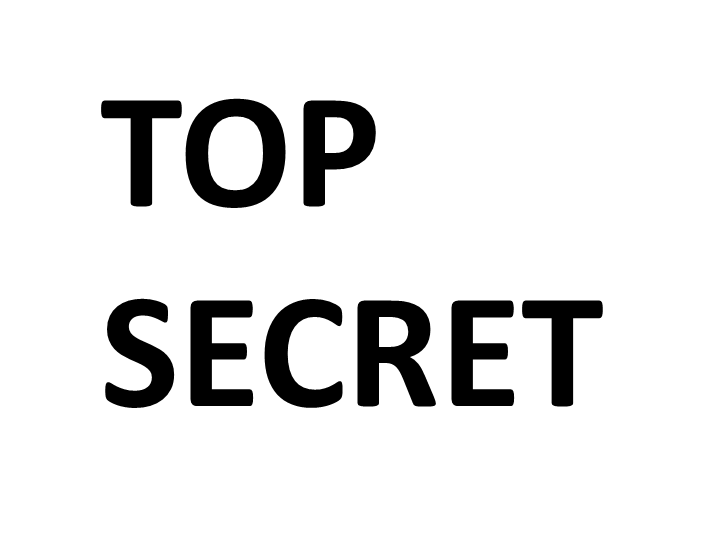

#### Altered Ciphertext CTR

In [87]:
aesCipher = Cipher(algorithms.AES(key),
                   modes.CTR(iv),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/altered_encrypted_ctr.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        # Encrypt the body of the image
        encrypted_image = bytearray(aesEncryptor.update(body))
        # Change the middle byte to a "0"
        encrypted_image[int(len(encrypted_image) / 2)] = 0
        # Convert back to bytes from bytearray
        encrypted_image = bytes(encrypted_image)
        # Decrypt the image
        decrypted_image = header + aesDecryptor.update(encrypted_image)
        # Generate the image 
        writer.write(decrypted_image)

#### The single byte change shows up as only a one-pixel difference

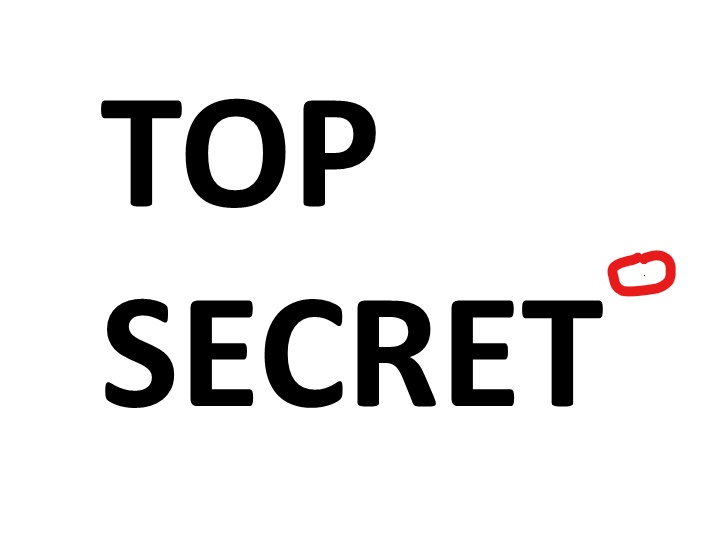

#### Altered Ciphertext CBC

In [88]:
aesCipher = Cipher(algorithms.AES(key),
                   modes.CBC(iv),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/altered_encrypted_cbc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        # Encrypt the body of the image
        encrypted_image = bytearray(aesEncryptor.update(body))
        # Change the middle byte to a "0"
        encrypted_image[int(len(encrypted_image) / 2)] = 0
        # Convert back to bytes from bytearray
        encrypted_image = bytes(encrypted_image)
        # Decrypt the image
        decrypted_image = header + aesDecryptor.update(encrypted_image)
        # Generate the image 
        writer.write(decrypted_image)

#### The single byte change shows up as AN ENTIRE BLOCK difference

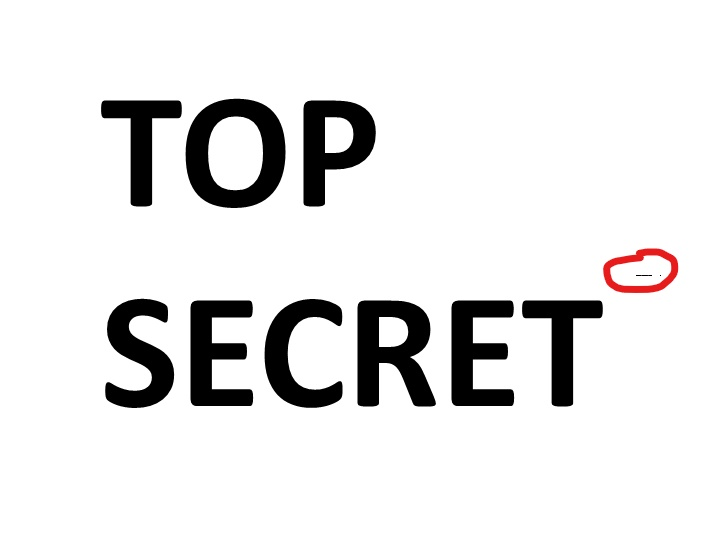

I was working through this one for some time. As expected, the CTR encryption to fail to produce significant changes after alteration. I was expecting a bigger fallout from CBC encryption after alteration. However, I only saw the pixels in one block of the image change. It makes sense that the pixels in the block changed, but I was expecting every subsequent block to be affected by the alteration because CBC encryption is supposed to use the encrypted string of the previous block to salt the encryption of the next block.

### Exercise 3.18 - Embracing Evil
#### Time to steal some payments from Acme. Start with one of the encrypted payment messages you created in Exercise 3.15. Calculate the size of the header up through the identification of the merchant and extract that many bytes from the encrypted message. XOR the plaintext header with the ciphertext header to get the *keystream*.  Once you have this, XOR the extracted keystream with a header identifying Evil LLC as the merchant. This is the "evil" ciphertext. Copy it over the bytes of the encrypted message to create a new payment message identifying your company as the recipient. Prove that it works by decrypting the modified message

#### Generate the order

In [89]:
### Bring in the message and keystream generation
### data from Exercise 3.15
key = os.urandom(32)
iv =  os.urandom(32)

# This is the sale I made with my own credit card.
# All this information is known to me and will be used
# to decipher other transactions.
payment_to_steal = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>
"""

aesContext = Cipher(algorithms.AES(preshared_key),
                    modes.CTR(preshared_iv),
                    backend=default_backend())
encryptor = aesContext.encryptor()
keystream = encryptor.update(my_purchase)

print(f"Payment I'm Going to Steal: {payment_to_steal.decode('utf-8')}")
print(f"Keystream generated:\n{keystream}\n")
# XOR the input message with the key stream
ciphertext = bytearray((char ^ keystream[i]) for i, char in enumerate(payment_to_steal))
print(f"Ciphertext Generated:\n{bytes(ciphertext)}")

Payment I'm Going to Steal: 
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>

Keystream generated:
b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf2\xa7n\xa6\xed\xd3I\x8aH\xf9\x9d^\x0e\xfex4\xf7\xaf\xbf\xf4$\x8d\xe8e\xcc\xcb\xfe\x96\x84\xd0\xe4\xa5\xe6\x96_\xcam\x7f\xc0\xe0D\x12f;\x9a)h\xc5|\xfdT\xba\xcc_cK+;\xbf\x10f\x9c\xfa\x1e\x8f5\x11\x1d\x95\xb5U\x1e\xcf\xd3\xca\xe7\x9au\xcay 8\xf2\xea\xef\x80\x06\xb85\x81C\xc0\x87,O\xb6\xdc\xd3\xdd\xf4\xf5\xcb\xa2\xe6\x8dZ\x045\xf9\x91\n\xb7[<\xc1agk\x9f\x07.\x8d\xba\x1b\xfa1KB\xd7\xf6b\x9a\x90k pV>\x93kx\x82n(\xcb\x00\xad

#### Intercept the order and obtain the keystream

In [90]:
# Find out how many bytes are in the header's
# plaintext that contain the merchant information.

# Convert the message to a byte array to support
# indexing.
payment_to_steal_arr = bytearray(payment_to_steal)
merchant_info_arr = payment_to_steal_arr[:70]

# Convert this subset (merchant_info) back into bytes
merchant_info = bytes(merchant_info_arr)
print(f"Header:\n{merchant_info.decode('utf-8')}")

# Extract the same number of bytes from the ciphertext. 
# Thankfully the ciphertext is already a bytearray.
ciphertext_extract = ciphertext[:len(merchant_info_arr)]

# Alter the merchant from Acme Inc. to Evil LLC
altered_message = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Evil LLC.</Merchant>"""

print("\nAltered Header:")
print(altered_message.decode('utf-8'))

# Obtain the keystream by XORing the plaintext
# header with the ciphertext header
hacked_keystream = bytearray((merchant_info[i] ^ ciphertext_extract_char) for i, ciphertext_extract_char in enumerate(ciphertext_extract))

# Check that this hacked keystream is in fact an
# exact match to the keystream used to encrypt the
# original message
print("------------------------------------------")
print(f"Successfully hacked keystream: {bytes(hacked_keystream) == keystream[:70]}")

# Use the newly created keystream to encrypt the
# altered message and re-route the money to Evil LLC.
altered_message_encrypted_header = bytearray((key_char ^ altered_message[i]) for i, key_char in enumerate(hacked_keystream))

# Paste the altered header onto the encrypted message
hijacked_message = altered_message_encrypted_header + ciphertext[70:]

# Decrypt the hijacked message, convert to bytes
hijacked_message_decrypted = bytes(bytearray((key_char ^ hijacked_message[i]) for i, key_char in enumerate(keystream)))

# Display the hijacked message (message with the new header)
print("Hijacked Message:")
print(hijacked_message_decrypted.decode('utf-8'))

Header:

<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>

Altered Header:

<XML>
    <CreditCardPurchase>
        <Merchant>Evil LLC.</Merchant>
------------------------------------------
Successfully hacked keystream: True
Hijacked Message:

<XML>
    <CreditCardPurchase>
        <Merchant>Evil LLC.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>



### Listing 3-11. SSLv3 Padding

In [91]:
def sslv3Pad(msg):
    padNeeded = (16 - (len(msg) % 16)) - 1
    padding = padNeeded.to_bytes(padNeeded+1, "big")
    return msg+padding

def sslv3Unpad(padded_msg):
    paddingLen = padded_msg[-1] + 1
    return padded_msg[:-paddingLen]

### Listing 3-12. SSLv3 Padding Oracle

In [92]:
class Oracle:
    def __init__(self, key, iv):
        self.key = key
        self.iv = iv
        
    def accept(self, ciphertext):
        aesCipher = Cipher(algorithms.AES(self.key),
                           modes.CBC(self.iv),
                           backend=default_backend())
        decryptor = aesCipher.decryptor()
        plaintext = decryptor.update(ciphertext)
        plaintext += decryptor.finalize()
        return plaintext[-1] == 15

### Listing 3-13. Lucky SSLv3 Padding Byte

In [93]:
# Partial Listing: Some Assembly Required

# This function assumes that the last ciphertext
# block is a full block of SSLV3 padding
def lucky_get_one(iv, ciphertext, block_number, oracle):
    block_start = block_number * 16
    block_end = block_start + 16
    block = ciphertext[block_start: block_end]
    
    # Copy the block over the last block
    mod_ciphertext = ciphertext[:-16] + block
    if not oracle.accept(mod_ciphertext):
        return False, None
    
    # This is valid! Let's get the byte!
    # We first need the byte decrypted from the
    # block. It was XORed with second to last block,
    # so byte = 15 XOR (last byte of second-to-last block).
    second_to_last = ciphertext[-32:-16]
    intermediate = second_to_last[-1] ^ 15
    
    # We still have to XOR it with its *real*
    # preceding block in order to get the true value
    if block_number == 0:
        prev_block = iv
    else:
        prev_block = ciphertext[block_start-16:block_start]
        
    return True, intermediate ^ prev_block[-1]

### Exercise 3.19 - Resistance is Futile

#### Finish the code for the padding oracle attack. 
#### 1) Pick a message that is exactly a multiple of 16 bytes in length (the AES block size) and create a fixed padding to append. The fixed padding can be any 16 bytes as long as the last byte is 15. Encrypt this message and pass it to the Oracle to make sure this code is working.
#### 2) Test recovering the last byte of the first block of the message. In a loop, create a new key and IV pair (and a new oracle with these values), encrypt the message, and call the lucky_get_one_byte() function, setting the block number to 0. Repeat the loop until this function succeeds and verify that the recovered byte is correct. Note that in Python an individual byte isn't treated as a byte type but is converted to an integer.
#### 3) The last step in order to decode the entire message is to be able to make any byte the last byte of a block. Again, for simplicity, keep the message being encrypted a perfect multiple of 16. To push any byte to the end of a block, add some extra bytes at the beginning and cut off an equal number at the end. You can now recover the entire message one byte at a time.

In [94]:
###########################################
###############   STEP 1   ################
###########################################
# Pick a message that is exactly a multiple 
# of 16 bytes (the one below is 32, from 
# figure 3-10 on page 105)
msg = b"GET / HTTP/1.1\r\nCookie: auth=1d3"
# Add padding to the message, resulting in 
# one block of padded text
padded_msg = sslv3Pad(msg)

# Generate a random key and IV value
key = os.urandom(16)
iv =  os.urandom(16)

# Encrypt our message using CBC mode
aesContext = Cipher(algorithms.AES(key),
                    modes.CBC(iv),
                    backend=default_backend())
encryptor = aesContext.encryptor()
encrypted_msg = encryptor.update(padded_msg)

OracleTest = Oracle(key=key, iv=iv)
print(f"Passes Oracle test: {OracleTest.accept(encrypted_msg)}")

Passes Oracle test: True


In [95]:
###########################################
###############   STEP 2   ################
###########################################

# While the recovered byte is incorrect
has_recovered_byte = False
while not has_recovered_byte:
    # Generate a random key and IV value
    key = os.urandom(16)
    iv =  os.urandom(16)
    
    # Create a new oracle with these values
    OracleTest = Oracle(key=key, iv=iv)
    
    # Encrypt our message using CBC mode
    aesContext = Cipher(algorithms.AES(key),
                        modes.CBC(iv),
                        backend=default_backend())
    encryptor = aesContext.encryptor()
    new_encrypted_msg = encryptor.update(padded_msg)
    
    # Check and see if the last byte of the first block
    # can be recovered
    has_recovered_byte, recovered_byte = lucky_get_one(iv=iv, ciphertext=new_encrypted_msg, 
                                                       block_number=0, oracle=OracleTest)
    
# Get the last byte of the first block of our message
# (or in other words, the 16th character)
first_block_last_byte = convert_to_str(msg[16-1])[-1]
recovered_byte = convert_to_str(recovered_byte)[-1]

print(f"Recovered byte is the last byte of the first block: {recovered_byte == first_block_last_byte}")

Recovered byte is the last byte of the first block: True


In [96]:
###########################################
###############   STEP 3   ################
###########################################

# Now that we know we can get the last byte of the
# first block, we should be able to decode the message
# byte by byte. 
#
# First, we want to keep the message a perfect
# multiple of 16. To do this, we add some extra bytes 
# to the beginning and cut off an equal number of bytes 
# at the end. This is accomplished in the shift_msg
# function below.
msg = b"GET / HTTP/1.1\r\nCookie: auth=1d3"
def shift_msg(msg, num_bytes, padding_character=b"_", block_num=0):
    # Add characters to the front of the message
    front_pad = num_bytes * padding_character
    shifted_msg = front_pad + msg
    return shifted_msg[:(len(shifted_msg) - num_bytes)]

# For each byte in the current_block
current_block = (len(msg) // 16) - 1
recovered_msg = bytearray()
for i in range(len(msg)-1, -1, -1):
    # Get the next character from the block
    shifted_msg = shift_msg(msg, i)
    
    # Get the value of the current block
    # based on the index (i) we're on
    if not (i % 16):
        current_block = i // 16
    
    # Add padding to the message, resulting in 
    # one block of padded text
    padded_msg = sslv3Pad(shifted_msg)
    
    ### PERFORM STEP 2 ###
    # While the recovered byte is incorrect
    has_recovered_byte = False
    while not has_recovered_byte:
        # Generate a random key and IV value
        key = os.urandom(16)
        iv =  os.urandom(16)
        
        # Create a new oracle with these values
        OracleTest = Oracle(key=key, iv=iv)
        
        # Encrypt our message using CBC mode
        aesContext = Cipher(algorithms.AES(key),
                            modes.CBC(iv),
                            backend=default_backend())
        encryptor = aesContext.encryptor()
        new_encrypted_msg = encryptor.update(padded_msg)
        
        # Check and see if the last byte of the first block
        # can be recovered
        has_recovered_byte, recovered_byte = lucky_get_one(iv=iv, ciphertext=new_encrypted_msg, 
                                                           block_number=current_block, oracle=OracleTest)
        
    recovered_msg.append(recovered_byte)
    
print(f"Recovered Message: {bytes(recovered_msg)}")

Recovered Message: b'GET / HTTP/1.1\r\nCookie: auth=1d\n'


### Exercise 3.20 - Statistics Are Also Futile

#### Count how many tries it took to find each byte in Exercise 3.19 and calculate the average number of tries per byte. In theory, this should work out to about 256 tries per byte.

In [97]:
###########################################
###############   STEP 3   ################
###########################################

# Now that we know we can get the last byte of the
# first block, we should be able to decode the message
# byte by byte. 
#
# First, we want to keep the message a perfect
# multiple of 16. To do this, we add some extra bytes 
# to the beginning and cut off an equal number of bytes 
# at the end. This is accomplished in the shift_msg
# function below.
msg = b"GET / HTTP/1.1\r\nCookie: auth=1d3"
def shift_msg(msg, num_bytes, padding_character=b"_", block_num=0):
    # Add characters to the front of the message
    front_pad = num_bytes * padding_character
    shifted_msg = front_pad + msg
    return shifted_msg[:(len(shifted_msg) - num_bytes)]

try_count = {}

# For each byte in the current_block
current_block = (len(msg) // 16) - 1
recovered_msg = bytearray()
for i in range(len(msg)-1, -1, -1):
    # Get the next character from the block
    shifted_msg = shift_msg(msg, i)
    
    # Get the value of the current block
    # based on the index (i) we're on
    if not (i % 16):
        current_block = i // 16
    
    # Add padding to the message, resulting in 
    # one block of padded text
    padded_msg = sslv3Pad(shifted_msg)
    
    # Start counting the number of attempts needed
    # to find the byte
    try_count[i] = 0
    
    ### PERFORM STEP 2 ###
    # While the recovered byte is incorrect
    has_recovered_byte = False
    while not has_recovered_byte:
        # Generate a random key and IV value
        key = os.urandom(16)
        iv =  os.urandom(16)
        
        # Create a new oracle with these values
        OracleTest = Oracle(key=key, iv=iv)
        
        # Encrypt our message using CBC mode
        aesContext = Cipher(algorithms.AES(key),
                            modes.CBC(iv),
                            backend=default_backend())
        encryptor = aesContext.encryptor()
        new_encrypted_msg = encryptor.update(padded_msg)
        
        # Check and see if the last byte of the first block
        # can be recovered
        has_recovered_byte, recovered_byte = lucky_get_one(iv=iv, ciphertext=new_encrypted_msg, 
                                                           block_number=current_block, oracle=OracleTest)
        
        try_count[i] += 1
        
    recovered_msg.append(recovered_byte)
    
print(f"Recovered Message: {bytes(recovered_msg)}")
print(f"Average number of tries per byte: {np.mean(list(try_count.values()))}")

Recovered Message: b'GET / HTTP/1.1\r\nCookie: auth=1d\n'
Average number of tries per byte: 218.53125


### Exercise 3.21 - Predicting the Time-Based Randomness

#### Write an AES encryption program that uses Python's random number generator to generate keys. Use the seed method to explicitly configure the generator based on time.time() rounded to the nearest second. Then use this generator to create a key and encrypt some data. Write a second program that takes the encrypted data as input and tries to guess the key. It should take a mininmum time and a maximum time as a range and try iterating between these points as seed values for random.

In [98]:
import time

#### Encrypt the message using a seed value based on the system's time

In [99]:
# Select a message
msg = b"I'm sure this message is secure."

# Use Python's Random module to produce pseudo-random keys.
# Generate a seed value based on the integer value of the 
# current time in seconds.
# Accomplished wrt
# https://stackoverflow.com/questions/5495492/random-byte-string-in-python
# https://docs.python.org/3/library/random.html
seed_val = int(time.time())
random.seed(seed_val)
key = random_bytes = bytes([random.getrandbits(8) for _ in range(0, 16)])
iv = random_bytes = bytes([random.getrandbits(8) for _ in range(0, 16)])

#
# Encrypt & decrypt our message using CBC mode
#
# Encrypt
aesContext = Cipher(algorithms.AES(key),
                    modes.CBC(iv),
                    backend=default_backend())
encryptor = aesContext.encryptor()
ciphertext = encryptor.update(msg)

## Decrypt
aesCipher = Cipher(algorithms.AES(key),
                           modes.CBC(iv),
                           backend=default_backend())
decryptor = aesCipher.decryptor()
plaintext = decryptor.update(ciphertext)
plaintext += decryptor.finalize()

plaintext

b"I'm sure this message is secure."

#### Now use all possible seeds in the last 30 seconds to attempt to decrypt the message again

In [100]:
def decrypt_by_time(ciphertext):
    current_time = int(time.time())
    for t in range(1, 30+1):
        seed_val = current_time-t
        
        # Set the seed based on this time
        random.seed(seed_val)
        
        # Generate keys and IVs
        key = random_bytes = bytes([random.getrandbits(8) for _ in range(0, 16)])
        iv = random_bytes = bytes([random.getrandbits(8) for _ in range(0, 16)])
        
        # Decrypt
        aesCipher = Cipher(algorithms.AES(key),
                                   modes.CBC(iv),
                                   backend=default_backend())
        decryptor = aesCipher.decryptor()
        plaintext = decryptor.update(ciphertext)
        plaintext += decryptor.finalize()
        print(plaintext)

time.sleep(1)     
decrypt_by_time(ciphertext)

b"I'm sure this message is secure."
b'\xe9\x1e\xda0*\xb6\xf8\xecL\xff\xea\xedp\xb6\x89\x7fY\xfa\x82\x8b\xc6\xb7\xadJ\x12\xfb\x8cs\x02@\x81\x80'
b'r\x01\x18\xa0Z\xa7 \x1a.\xda\x87\xe4?\xeb\x9b;\x87\xa1r\xf7\xc2\xfe\xb7\x02u\xe7\xecZ\xf9\xb9\x90\x8e'
b'\x13\x87\x9f--$\xba\xce7\xd3S\xcb)HH\xcbi\xee\xf1\xdf\x87\x98\xe6\x15\x00\xdb\x8e\x1a"\xd3\n\x1e'
b'\xb5\x04\xcc~\xeb%_--\x84\xcf6\tC|#u\x1a\xbc\xd7Vv^\x81\xaf\xe7\x9e\xb2\x1b3ym'
b'!\t\xee\x12\x8e\xb2{\x9f\xd2\xe3\xfe\x97KX\xf4\xac\x00\x08\x1c%\xc9]\x067\x1f\x89\xbc\xf2\x0f_\x983'
b'\x97\xef\xb9\x8c\xcd/tr\xdfc>\xf2~\xb2\xcc,\xda&\xe7\x0fX\xde\x14\xa5\xaft\x95\xe9\x99\xf8@\xf4'
b'tD\x1a\xa7\x8a\xe6\xd3\xee\xe6\x9dV\xef;`D\xc9R`\x96@\xda\x07\xb3PWI\xb5\x0ba+\x9d\x1e'
b'\xba\xf3}\xdce"\x1b\x19\x1f\xddp\x8eI\xf9d\x0b\xf3\x8140\xd0\xb7\r\x05.R=?\xbf\xe1M#'
b'\x8fV?\xd2I\xd0R4\x1b~\\\xbd\x19\xe9\xc8^\x8c\xf9\x15\x8a\xc9\xc1d\xb3Y\x16\xb4\xd8\x04\x84\x05\xa3'
b'\x87\x93\xad>"\x95y\xccX\xf4\xd0s\x11\xa2m\x94R\'\xe6#\x97\xb9\x12\xe2\xf0NI\xb1!\xe

We can see our original message buried within the nonsense items. This pseudo-random generation based on time is a really interesting catch. If the attacker knew the time that an account was generated and the precision of this random number generator's time counting, they could likely try a bunch of different random keys until they found the random key that could be used to access that user's account.

# Chapter 4 - Asymmetric Encryption: Public/Private Keys

### Listing 4-1. RSA Key Generation

In [101]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

# Generate a private key
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048,
    backend=default_backend()
)

# Extract the public key from the private key
public_key = private_key.public_key()

# Convert the private key into bytes. We won't encrypt it this time.
private_key_bytes = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

# Convert the public key into bytes
public_key_bytes = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)

# Convert the private key bytes back to a key.
# Because there is no encryption of the private key, there is no password.
private_key = serialization.load_pem_private_key(
    private_key_bytes,
    backend=default_backend(),
    password=None)
public_key = serialization.load_pem_public_key(
    public_key_bytes,
    backend=default_backend())

### Listing 4-2. GMPY2

In [102]:
#### DANGER ####
# The following RSA encryption and decryption is
# completely unsafe and terribly broken. DO NOT USE
# for anything other than the practice exercise
################
def simple_rsa_encrypt(m, publickey):
    # Public_numbers returns a data structure with the 
    # 'e' and 'n' parameters
    numbers = publickey.public_numbers()
    
    # Encryption is (m^e) % n
    return gmpy2.powmod(m, numbers.e, numbers.n)

def simple_rsa_decrypt(c, privatekey):
    # private_numbers returns a data structure with the 
    # 'd' and 'n' parameters
    numbers = privatekey.private_numbers()
    
    # Decryption is (c^d) % n
    return gmpy2.powmod(c, numbers.d, numbers.public_numbers.n)
#### DANGER ####

### Listing 4-3. Integer/Byte Conversion

In [103]:
def int_to_bytes(i):
    # i might be a gmpy2 big integer; convert back to a Python int
    i = int(i)
    return i.to_bytes((i.bit_length()+7)//8, byteorder='big')

def bytes_to_int(b):
    return int.from_bytes(b, byteorder='big')

### Exercise 4.0 - Attempting RSA Encryption

#### Use listings 4.1 - 4.3 to perform basic RSA encryption

Using the below method I kept running into the error that the "Password was given but private key is not encrypted." My attempt was to create a public and private key, then create a message, turn that message into an integer value, encrypt that message using the public key, then decrypt the message using the private key. I wonder if the difference is that I am feeding the "encryption_algorithm=serialization.NoEncryption()" argument into the **private_key_bytes** object.

In [104]:
##### Listing 4.1 ####
## Generate a private key
#private_key = rsa.generate_private_key(
#    public_exponent=65537,
#    key_size=2048,
#    backend=default_backend()
#)
#
## Extract the public key from the private key
#public_key = private_key.public_key()
#
## Convert the private key into bytes.
#private_key_bytes = private_key.private_bytes(
#    encoding=serialization.Encoding.PEM,
#    format=serialization.PrivateFormat.TraditionalOpenSSL,
#    encryption_algorithm=serialization.NoEncryption()
#)
#
## Convert the public key into bytes
#public_key_bytes = public_key.public_bytes(
#    encoding=serialization.Encoding.PEM,
#    format=serialization.PublicFormat.SubjectPublicKeyInfo
#)
#
## Select a message to send
#m = b"boy howdie i love me some asymetric encryption"
## Encrypt the message using this integer
#pwd = simple_rsa_encrypt(m=bytes_to_int(m), publickey=public_key)
#pwd_bytes = int_to_bytes(pwd)
#
## Convert the private key bytes back to a key.
## Now that there is an encryption of the private key, there is a password.
#private_key = serialization.load_pem_private_key(
#    private_key_bytes,
#    backend=default_backend(),
#    password=pwd_bytes)
#public_key = serialization.load_pem_public_key(
#    public_key_bytes,
#    backend=default_backend())

### Listing 4-4. RSA Done Simply

In [105]:
import gmpy2, os, binascii
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

In [106]:
# Import listing 4-2
#### DANGER ####
# The following RSA encryption and decryption is
# completely unsafe and terribly broken. DO NOT USE
# for anything other than the practice exercise
################
def simple_rsa_encrypt(m, publickey):
    # Public_numbers returns a data structure with the 
    # 'e' and 'n' parameters
    numbers = publickey.public_numbers()
    
    # Encryption is (m^e) % n
    return gmpy2.powmod(m, numbers.e, numbers.n)

def simple_rsa_decrypt(c, privatekey):
    # private_numbers returns a data structure with the 
    # 'd' and 'n' parameters
    numbers = privatekey.private_numbers()
    
    # Decryption is (c^d) % n
    return gmpy2.powmod(c, numbers.d, numbers.public_numbers.n)
#### DANGER ####

# Import listing 4-3
def int_to_bytes(i):
    # i might be a gmpy2 big integer; convert back to a Python int
    i = int(i)
    return i.to_bytes((i.bit_length()+7)//8, byteorder='big')

def bytes_to_int(b):
    return int.from_bytes(b, byteorder='big')

# Build an RSA encryption program
def main():
    public_key_file = None
    private_key_file = None
    public_key = None
    private_key = None
    while True:
        print("Simple RSA Crypto")
        print("---------------------")
        print(f"\tprivate key file: {private_key_file}")
        print(f"\tpublic key file: {public_key_file}")
        print(f"\t1. Encrypt Message.")
        print(f"\t2. Decrypt Message.")
        print(f"\t3. Load public key file.")
        print(f"\t4. Load private key file.")
        print(f"\t5. Create and load new public and private key files.")
        print(f"\t6. Quit.\n")
        choice = input(" >> ")
        if choice == '1':
            if not public_key:
                print("\nNo public key loaded\n")
            else:
                message = input("\nPlaintext: ").encode()
                message_as_int = bytes_to_int(message)
                cipher_as_int = simple_rsa_encrypt(message_as_int, public_key)
                cipher = int_to_bytes(cipher_as_int)
                print(f"\nCiphertext (hexlified): {binascii.hexlify(cipher)}\n")
                
        elif choice == '2':
            if not private_key:
                print("\nNo private key loaded\n")
            else:
                cipher_hex = input("\nCiphertext (hexlified): ").encode()
                cipher = binascii.unhexlify(cipher_hex)
                cipher_as_int = bytes_to_int(cipher)
                message_as_int = simple_rsa_decrypt(cipher_as_int,
                                                    private_key)
                print(f"\nPlaintext: {message}\n")
                
        elif choice == '3':
            public_key_file_temp = input("\nEnter public key file: ")
            if not os.path.exists(public_key_file_temp):
                print("File {} does not exist.")
            else:
                with open(public_key_file_temp, 'rb') as public_key_file_object:
                    public_key = serialization.load_pem_public_key(
                                    public_key_file_object.read(),
                                    backend=default_backend())
                    public_key_file = public_key_file_temp
                    print("\nPublic Key file loaded.\n")
                    
                    # unload private key if any
                    private_key_file = None
                    private_key = None
                    
        elif choice == '4':
            private_key_file_temp = input ("\nEnter private key file: ")
            if not os.path.exists(private_key_file_temp):
                print("File {} does not exist")
            else:
                with open(private_key_file_temp, 'rb') as private_key_file_object:
                    private_key = serialization.load_pem_private_key(
                                    private_key_file_object.read(),
                                    backend=default_backend(),
                                    password=None)
                    private_key_file = private_key_file_temp
                    print("Private Key file loaded.")
                    
        elif choice == '5':
            private_key_file_temp = input("\nEnter a file name for new private key: ")
            public_key_file_temp = input("\nEnter a file name for a new public key: ")
            if os.path.exists(private_key_file_temp) or os.path.exists(public_key_file_temp):
                print("File already exists.")
            else:
                with open(private_key_file_temp, 'wb+') as private_key_file_obj:
                    with open(public_key_file_temp, 'wb+') as public_key_file_obj:
                        private_key = rsa.generate_private_key(
                                        public_exponent=65537,
                                        key_size =2048,
                                        backend =default_backend())
                        public_key = private_key.public_key()
                        private_key_bytes = private_key.private_bytes(
                                                encoding=serialization.Encoding.PEM,
                                                format=serialization.PrivateFormat.TraditionalOpenSSL,
                                                encryption_algorithm=serialization.NoEncryption())
                        private_key_file_obj.write(private_key_bytes)
                        public_key_bytes = public_key.public_bytes(
                            encoding=serialization.Encoding.PEM,
                            format=serialization.PublicFormat.SubjectPublicKeyInfo)
                        public_key_file_obj.write(public_key_bytes)
                        
                        public_key_file = None
                        private_key_file = private_key_file_temp
                        
        elif choice == '6':
            print("\n\nTerminating. This program will self destruct in 5 seconds.\n")
            break
        else:
            print(f"\n\nUnknown option {choice}.")

### Exercise 4.1 - Simple RSA Encryption
#### Using Listing 4-4, set up communication from Alice to Bob and then send a few encrypted messages from Alice to Bob for decryption

#### Interfacing with our program
#### > Select (5) to establish a new private and public key
#### >> Store private key as ./data/rsa/private_key.txt
#### >> Store public key as ./data/rsa/public_key.txt
#### > Select (4) and load our private key (./data/rsa/private_key.txt)
#### > Select (3) and load our public key (./data/rsa/public_key.txt)
#### > Select (1) to encrypt a message
#### > Select (2) to decrypt the hexlified output of our output to the previous step.

In [107]:
#main()

### Exercise 4.2 - Who Goes There? Bob? Is That You?

#### Suppose Eve knows everything about the classified ads, the carrier penguins, and even the encryption program. How can Eve (or any third party) position herself such that she can trick Alice into sending messages that Eve can decrypt, and Bob into receiving ***only*** false messages from Eve instead of Alice?

Alice (public key holder) sends messages to Bob (private key holder) about the state of West Antartica. If Eve knows the public key she can encrypt messages that can be decoded using Bob's private key. The specific way this could be carried out might depend on how gullible Alice truly is. The below answers are some ways that Eve could hijack the communication between Alice and Bob from most gullible to least gullible.

Eve pretends to be Alice by encrypting a message using the public key posted in the newspaper.

#### Option 1
In her first message to Bob, Eve (posing as Alice) states that publishing a public key in the newspaper might have alerted enemies about their communication schemes. In order to set up a new line of communication, she should instead encrypt messages using a new public key (provided by Eve) and send these messages through a specific channel (that Eve can intercept). 

#### Option 2
In her first message to Bob, Eve (posing as Alice) states that there might be a security flaw in the configuration of their current encryption method and that she needs the private key to check for any mistakes. She requests that a brave pengiun march across Antartica leaving at a certain time from a certain place to deliver this information. Eve intercepts this penguin.

#### Option 3
In her first message to Bob, Eve (posing as Alice) states that she forgot the crucial need encrypt the messages Bob uses to communicate her assignments! If they want to establish two-way communication, he should also have a new private/puvblic key pair. She encrypts a message that contains this new private key for Bob and tells her that the public key will be posted to the same newspaper. Now that Bob communicates with Alice through Eve, Eve can pretend to be Bob and ask for an encrypted copy of the original private key. At this point, Eve would have access to both lines of communication and be able to impersonate either Alice or Bob.

### Exercise 4.3 - What's the answer to life, the universe, and everything?

#### If you suspect you know what Alice is sending in her encrypted messages, explain or demonstrate how you would verify your guesses

If you knew the exact string that Alice was sending in her encrypted messages, you could use the public key to encrypt that string and check that the ciphertext that Alice sent and the ciphertext that you generated were exact matches. For instance, if you intercepted the ciphertext

"b'90f2b674410c2c412bc259af270808b656949ac0359358e1038d3906d6efbf4cea916bea8f68b8a62ede78cea79a6d2130f500d3cdedf0de5aebcf131ff6449db8bdd17b75ce8cc36fe51700d3a1c26ed3f79d817781ca8e3ced22f7b2757e8b6c2609c1a4e5503ab56f648b6fd239fc1d9d626cd6a3bfe32a633bca1d8aee742eec0fe93911a3f461abb2b1a183c420031c1e2bb0d6bbf9aeca39fa927b888eb22fd7461d70d47297090add5ea2f66cd36980c5734bf94b79ae43a62b7e73746bac45095699279ae9a9fca4fb7056682d137c87d4f0eb7fce0789cd94878ff7bb288046fa4a8a6e6db02fdd18d81104e636238e126aa156ba3447feaf41ad95'"

and you had a strong suspicion that the message was "Pssssssst. This is a secret.", you could encrypt your guess using the public key and if the resulting ciphertext was 

"b'90f2b674410c2c412bc259af270808b656949ac0359358e1038d3906d6efbf4cea916bea8f68b8a62ede78cea79a6d2130f500d3cdedf0de5aebcf131ff6449db8bdd17b75ce8cc36fe51700d3a1c26ed3f79d817781ca8e3ced22f7b2757e8b6c2609c1a4e5503ab56f648b6fd239fc1d9d626cd6a3bfe32a633bca1d8aee742eec0fe93911a3f461abb2b1a183c420031c1e2bb0d6bbf9aeca39fa927b888eb22fd7461d70d47297090add5ea2f66cd36980c5734bf94b79ae43a62b7e73746bac45095699279ae9a9fca4fb7056682d137c87d4f0eb7fce0789cd94878ff7bb288046fa4a8a6e6db02fdd18d81104e636238e126aa156ba3447feaf41ad95'"

You would know for sure that that was the message Alice sent to Bob.

### Exercise 4.4 - Brute Force RSA
#### Write a brute force algorithm that can decrypt an RSA-encrypted word that is all lowercase and less than 4 characters. Inputs to this brute-force function should be the RSA public key and the ciphertext

In [108]:
from itertools import product

In [109]:
# Generate a new private / public key pair
private_key = rsa.generate_private_key(
                public_exponent=65537,
                key_size =2048,
                backend =default_backend())
public_key = private_key.public_key()

In [110]:
# This function brute-force decodes any RSA encrypted string 
# that is [max_string_length] characters (or fewer) in length
def brute_force_rsa(public_key, ciphertext, max_string_length=4):
    # Create a list of all possible combinations of
    # [max_string_length] letters to encrypt
    plaintext_bytes = generate_all_possible_bytes(max_string_len=max_string_length)
    # Map these plaintext combinations to integers
    possible_plaintext_as_int = list(map(bytes_to_int, plaintext_bytes))
    
    guess = -1
    # While we have not guessed the correct input
    # that gives a matching ciphertext
    for plaintext_int in tqdm(possible_plaintext_as_int):
        # RSA encrypt the next possible plaintext combination
        # and return the bytes it represents if it matches the ciphertext.
        guess = simple_rsa_encrypt(plaintext_int, public_key)
        if guess == ciphertext:
            return int_to_bytes(plaintext_int)
        
# This function only really needs to be run
# one time to generate all possible combinations
# of 4-letter and below strings
# Accomplished wrt
# https://stackoverflow.com/questions/46496202/all-2-character-a-z-0-9-combinations-python
def generate_all_possible_bytes(max_string_len=4):
    possible_strings = []
    # Create an alphabet of lowercase letters
    alphabet = string.ascii_lowercase 
    # Calculate the 26^i possible combinations
    for i in range(1, max_string_len+1): 
        possible_strings += list(product(alphabet, repeat=i))
        
    # Convert this from a list of tuples
    # to a list of possible bytes
    all_possible_bytes = [''.join(combo).encode('utf-8') for combo in possible_strings]
    return all_possible_bytes

# Select some strings to decode based on this
# ciphertext as integer
plaintext_to_decode = [b'rsa', b'was', b'a', b'good', b'idea', b'at', b'the', b'time']
plaintext_as_int = list(map(bytes_to_int, plaintext_to_decode))
ciphertext_as_int = [simple_rsa_encrypt(plaintext_int, public_key) for plaintext_int in plaintext_as_int]

# Decode each of these plaintext strings
# one by one (took me a total of about ~50 seconds)
#for cipher in ciphertext_as_int:
#    print(brute_force_rsa(public_key, ciphertext=cipher))

### Exercise 4.5 - Waiting is the Hardest Part
#### Modify your brute force program to try all possible words of 5 or fewer characters. Compare the amount of time it takes (in the worst case scenario) to brute force a 4-letter word vs a 5-letter word. About how many times longer does it take and why? How long would it take to decode a 6-letter word?

It takes about 26 times longer to decrypt a 4-letter word compared to a 5-letter word. This is because each character added to the max string length adds another 26 possible combinations that we need to decrypt (technically 26^n + 26^(n-1) + 26^(n-2) etc. as calculated in the recursive FindNumCombinations function). It would take about 26 times as long to decode a 6-letter word as it would to decode a 5-letter word.

In [111]:
#time_taken = {}
#for max_string_len in range(1, 5+1):
#    # Let the plaintext we are searching for be
#    # 0 (unfindable) so that our program needs to
#    # search and encrypt all possible combinations
#    simple_rsa_encrypt(0, public_key)
#    
#    # Calculate how much time it takes to run the program
#    start = time.time()
#    brute_force_rsa(public_key, ciphertext, max_string_length=max_string_len)
#    stop = time.time()
#    
#    time_taken[max_string_len] = stop - start
## Save this data so we don't need to run 
## this brute-force program again!
#with open('./data/brute_force_rsa.json', 'w') as f:
#    json.dump(time_taken, f)

# Load the data from our previous analysis
with open('./data/brute_force_rsa.json', 'r') as f:
    time_taken = json.load(f)

# Add in some additional data we can explore mathematically
time_taken['0'] = 0
for i in range(6, 15+1):
    time_taken[str(i)] = np.nan
    
# Convert the dictionary to a dataframe and add column
# headers
df = pd.DataFrame.from_dict(time_taken, orient='index')
df.reset_index(inplace=True)
df.columns = ["Max String Length", 'RSA Decryption Time']
df['Max String Length'] = df['Max String Length'].astype(int)
df.sort_values(['Max String Length'], inplace = True)

### Find the number of combinations that the program needs to
### work through to brute-force decrypt
# This function recursively calculates the number of 
# different possible string combinations of [max_string_len]
# characters in a string
def FindNumCombinations(max_string_len, num_characters=26):
    # Base case
    if max_string_len == 0:
        return 0
    return (num_characters**max_string_len) + FindNumCombinations(max_string_len-1, num_characters)

# For some reason pandas does not like to apply my recursive
# function so I will calculate the number of combinations manually
df['NumCombinations'] = df['Max String Length'].map(FindNumCombinations)

# Calculate the decryption rate in terms of seconds per 
# combination that we need to work through
def get_decryption_rate(row):
    if (row['RSA Decryption Time'] == row['RSA Decryption Time'] and
        row['RSA Decryption Time'] != 0):
            return row['RSA Decryption Time'] / row['NumCombinations']
    return np.nan
df['DecryptionRate'] = df.apply(lambda row: get_decryption_rate(row), axis=1)

# Estimate the decryption rate based on the average decryption rate
avg_decryption_rate = round(np.mean(df['DecryptionRate'].iloc[2:5]), 8)
print(f"Average decryption rate (Based on last 3 Decryption Rates): {avg_decryption_rate:,} Seconds/Combination")
df['Estimated Decryption Time'] = avg_decryption_rate * df['NumCombinations']

df = df[['Max String Length', 'NumCombinations', 'DecryptionRate', 'RSA Decryption Time', 'Estimated Decryption Time']]

# Convert decryption time from seconds to years
df['Years To Decrypt'] = df['Estimated Decryption Time'] / (60 * 60 * 24 * 365)

df

Average decryption rate (Based on last 3 Decryption Rates): 6.172e-05 Seconds/Combination


Max String Length         NumCombinations  DecryptionRate  \
5                   0                       0             NaN   
0                   1                      26        0.000269   
1                   2                     702        0.000071   
2                   3                   18278        0.000056   
3                   4                  475254        0.000058   
4                   5                12356630        0.000055   
6                   6               321272406             NaN   
7                   7              8353082582             NaN   
8                   8            217180147158             NaN   
9                   9           5646683826134             NaN   
10                 10         146813779479510             NaN   
11                 11        3817158266467286             NaN   
12                 12       99246114928149462             NaN   
13                 13     2580398988131886038             NaN   
14                 14    67090373691429037014             NaN   
15                 15  1744349715977154962390             NaN   

    RSA Decryption Time Estimated Decryption Time Years To Decrypt  
5              0.000000                         0                0  
0              0.006999                0.00160472      5.08853e-11  
1              0.050001                 0.0433274       1.3739e-09  
2              1.020486                   1.12812      3.57724e-08  
3             27.620106                   29.3327      9.30133e-07  
4            678.314607                   762.651      2.41835e-05  
6                   NaN                   19828.9      0.000628771  
7                   NaN                    515552        0.0163481  
8                   NaN               1.34044e+07         0.425049  
9                   NaN               3.48513e+08          11.0513  
10                  NaN               9.06135e+09          287.333  
11                  NaN               2.35595e+11          7470.67  
12                  NaN               6.12547e+12           194237  
13                  NaN               1.59262e+14      5.05017e+06  
14                  NaN               4.14082e+15      1.31304e+08  
15                  NaN               1.07661e+17      3.41392e+09

In [112]:
fig = px.line(df.iloc[0:7], x="Max String Length", y='RSA Decryption Time', 
              title='Estimated Brute Force RSA Decryption Time (Seconds)')
fig.show()

In [113]:
fig = px.line(df, x="Max String Length", y='Estimated Decryption Time', 
              title='Estimated Brute Force RSA Decryption Time (Seconds)')
# Change line color, accomplished wrt
# https://stackoverflow.com/questions/58188816/plotly-how-to-set-line-color
fig['data'][0]['line']['color']="orange"
fig.show()

### Exercise 4.6 - Dictionary Attacks
#### Modify your brute force program to try arbitrary english words before random combinations of characters

In [114]:
# This function checks a dictionary of english words 
# before brute-force decoding any RSA encrypted string 
# that is [max_string_length] characters (or fewer) in length
def dictionary_rsa_decryption(public_key, cipherint, reference_words_int, max_string_length=4):
    
    ### Check values in our dictionary ###
    # While we have not guessed the correct input
    # that gives a matching ciphertext
    for plaintext_int in tqdm(reference_words_int):
        # RSA encrypt the next possible plaintext combination
        # and return the bytes it represents if it matches the ciphertext.
        guess = simple_rsa_encrypt(plaintext_int, public_key)
        if guess == cipherint:
            return int_to_bytes(plaintext_int)
    
    ### Check remaining possible values ###
    # Create a list of all possible combinations of
    # [max_string_length] letters to encrypt. Then, subtract
    # the known words from our reference_words from this
    # complete list of combinations so we do not double-count
    # any values
    plaintext_bytes = generate_all_possible_bytes(max_string_len=max_string_length)
    remaining_values = list(set(plaintext_bytes) - set(reference_words))
    # Map these plaintext combinations to integers
    remaining_possible_plaintext_as_int = list(map(bytes_to_int, remaining_values))
    guess = -1
    # While we have not guessed the correct input
    # that gives a matching ciphertext
    for plaintext_int in tqdm(remaining_possible_plaintext_as_int):
        # RSA encrypt the next possible plaintext combination
        # and return the bytes it represents if it matches the ciphertext.
        guess = simple_rsa_encrypt(plaintext_int, public_key)
        if guess == cipherint:
            return int_to_bytes(plaintext_int)

# Use the common_words dataframe that we imported at
# the beginning of the notebook as our reference dictionary
reference_words = [str(word).encode('utf-8') for word in common_words.word.unique()]
reference_words_int = list(map(bytes_to_int, reference_words))

# Select some strings to decode based on this
# ciphertext as integer. Removing punctuation from
# string accomplished wrt
# https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
plaintext = "I can't believe that I ever abandoned cryptographic padding."
#plaintext = input("Message to break: ")
plaintext_no_punc = plaintext.translate(str.maketrans('', '', string.punctuation))
plaintext_to_decode = [text.encode('utf-8') for text in plaintext_no_punc.lower().split(' ')]
plaintext_as_int = list(map(bytes_to_int, plaintext_to_decode))
ciphertext_as_int = [simple_rsa_encrypt(plaintext_int, public_key) for plaintext_int in plaintext_as_int]

start = time.time()
for cipher in ciphertext_as_int:
    print(dictionary_rsa_decryption(public_key, cipherint=cipher, reference_words_int=reference_words_int))
end = time.time()

print(f"Total time needed to break RSA encryption for this message: {end-start} seconds.")

  1%|          | 3995/333332 [00:00<00:16, 20040.05it/s]

b'i'


  0%|          | 0/333332 [00:00<?, ?it/s]

b'cant'
b'believe'
b'that'
b'i'
b'ever'


  1%|          | 3933/333332 [00:00<00:17, 19341.55it/s]

b'abandoned'


  1%|          | 4014/333332 [00:00<00:16, 19607.64it/s]

b'cryptographic'


  4%|▍         | 14129/333332 [00:00<00:17, 18021.58it/s]

b'padding'
Total time needed to break RSA encryption for this message: 2.9233474731445312 seconds.


### Exercise 4.7 - Homomorphic Property of Unpadded RSA
#### Use the equation below to multiply two RSA-encrypted strings together and decrypt the results
$(m_{1})^{e}(m_{2})^{e}(mod n) = (m_{1}m_{2})^{e}(mod n)$

Takes a long time to calculate the plaintext product, so to run this exercise we should just un-comment line 10 and line 29

In [115]:
# Listing 4.2  #
#### DANGER ####
# The following RSA encryption and decryption is
# completely unsafe and terribly broken. DO NOT USE
# for anything other than the practice exercise
################
def simple_rsa_encrypt(m, publickey):
    # Public_numbers returns a data structure with the 
    # 'e' and 'n' parameters
    numbers = publickey.public_numbers()
    
    # Encryption is (m^e) % n
    return gmpy2.powmod(m, numbers.e, numbers.n)

def simple_rsa_decrypt(c, privatekey):
    # private_numbers returns a data structure with the 
    # 'd' and 'n' parameters
    numbers = privatekey.private_numbers()
    
    # Decryption is (c^d) % n
    return gmpy2.powmod(c, numbers.d, numbers.public_numbers.n)
#### DANGER ####

# Listing 4.3 #
def int_to_bytes(i):
    # "i" might be a gmpy2 big integer; convert back to a Python int
    i = int(i)
    return i.to_bytes((i.bit_length()+7)//8, byteorder='big')

def bytes_to_int(b):
    return int.from_bytes(b, byteorder='big')

In [116]:
# Generate some plaintext
plaintext = b"This message is Top Secret"
junktext = b"paspdandfisu08h08ujkkljngo"

# Convert these plaintexts to integers
plaintext_int = bytes_to_int(plaintext)
junktext_int = bytes_to_int(junktext)

# Find the product of the two plaintexts
#plaintext_product = ((plaintext_int**e) * (junktext_int)**e) % n

# Encrypt these plaintext integers
plaintext_cipher_int = simple_rsa_encrypt(plaintext_int, public_key)
junktext_cipher_int = simple_rsa_encrypt(junktext_int, public_key)

# Calculate the product of these two integers
cipher_product = plaintext_cipher_int * junktext_cipher_int

# Retrieve e and n from our public_key
numbers = public_key.public_numbers()
e = numbers.e
n = numbers.n

# Decrypt the product of these two integers
decrypted_int = (cipher_product) % n

# Compare the integer results of the plaintext and ciphertext integers
# to validate the equation.
#print(f"Valid equation: {int(decrypted_int) == plaintext_product}")

### Listing 4-5. Exercise 4.7 Solution

In [117]:
#### DANGER ####
# The following RSA encryption and decryption is
# completely unsafe and terribly broken. DO NOT USE
# for anything other than the practice exercise
################
def simple_rsa_encrypt(m, publickey):
    # Public_numbers returns a data structure with the 
    # 'e' and 'n' parameters
    numbers = publickey.public_numbers()
    
    # Encryption is (m^e) % n
    return gmpy2.powmod(m, numbers.e, numbers.n)

def simple_rsa_decrypt(c, privatekey):
    # private_numbers returns a data structure with the 
    # 'd' and 'n' parameters
    numbers = privatekey.private_numbers()
        
    # Decryption is (c^d) % n
    return gmpy2.powmod(c, numbers.d, numbers.public_numbers.n)
    
n = public_key.public_numbers().n
a = 5
b = 10

encrypted_a = simple_rsa_encrypt(a, public_key)
encrypted_b = simple_rsa_encrypt(b, public_key)

encrypted_product = (encrypted_a * encrypted_b) % n

product = simple_rsa_decrypt(encrypted_product, private_key)
print(f"{a} x {b} = {product}")

5 x 10 = 50


### Exercise 4.8 - Eve's Protege
#### Recreate Eve's chosen ciphertext attack. Create a sample message and encrypt it using a public key. Then, encrypt a value of r (such as 2). Multiply the encrypted integer result and take that product modulo n. Decrypt this new number and convert it to bytes to see that it is gibberish. THEN take the new number and multiply it by the inverse of r (mod n). Convert this result back to bytes to see the original message.

In [118]:
# Generate some plaintext and a value for "r"
plaintext = b"This message is Top Secret"
r = 2

# Convert the plaintext to int
plaintext_int = bytes_to_int(plaintext)

# Encrypt the plaintext and "r" values using the public key
encrypted_plaintext = simple_rsa_encrypt(plaintext_int, public_key)
encrypted_r = simple_rsa_encrypt(r, public_key)

# Calculate the product of the encrypted integers mod n
n = public_key.public_numbers().n
cipher_product = (encrypted_plaintext * encrypted_r) % n

# Display the gibberish result of decrypting the cipher_product
decrypted_cipher_product = simple_rsa_decrypt(cipher_product, private_key)
print(f"Gibberish output without inverse mod: {bytes(binascii.hexlify(int_to_bytes(decrypted_cipher_product)).decode(), 'utf-8')}")

# Now multiply our decrypted cipher product by the inverse
# of r mod n and take the Modulo n to retrieve our original number
r_inv_modulo_n = gmpy2.powmod(r, -1, n)
original_number = (decrypted_cipher_product * r_inv_modulo_n) % n

print(f"\nPlaintext Message: {bytes(int_to_bytes(plaintext_int).decode(), 'utf-8')}")
print(f"Decrypted Message: {bytes(int_to_bytes(original_number).decode(), 'utf-8')}")

Gibberish output without inverse mod: b'a8d0d2e640dacae6e6c2ceca40d2e640a8dee040a6cac6e4cae8'

Plaintext Message: b'This message is Top Secret'
Decrypted Message: b'This message is Top Secret'


### Listing 4-6. Common Modulus

In [119]:
# Partial Listing: Some Assembly Required

# Derived From: https://github.com/a0xnirudh/Exploits-and-Scripts/tree/master/RSA%20Attacks
# Inputs are the two different ciphertexts that result from
# encrypting the same message with different public keys (c1 & c2)
# as well as the two different public key objects (key1 & key2)
def common_modulus_decrypt(c1, c2, key1, key2):
    key1_numbers = key1.public_numbers()
    key2_numbers = key2.public_numbers()
    
    if key1_numbers.n != key2_numbers.n:
        raise ValueError("Common modulus attack requires a common modulus")
    n = key1_numbers.n
    
    if key1_numbers.e == key2_numbers.e:
        raise ValueError("Common modulus attack requires different public exponents")
    
    e1, e2 = key1_numbers.e, key2_numbers.e
    num1, num2 = min(e1,e2), max(e1,e2)
    
    while num2 != 0:
        num1, num2 = num2, num1 % num2
    gcd = num1
    
    a = gmpy2.invert(key1_numbers.e, key2_numbers.e)
    b = float(gcd - (a*e1))/float(e2)
    
    i = gmpy2.invert(c2, n)
    mx = pow(c1,a,n)
    my = pow(i, int(-b), n)
    return mx * my % n

### Listing 4-7. Common Modulus Key Generation

In [120]:
# Partial Listing: Some Assembly Required

private_key1 = rsa.generate_private_key(
                    public_exponent=65537,
                    key_size=2048,
                    backend=default_backend()
)
public_key1 = private_key1.public_key()

n = public_key1.public_numbers().n

public_key2 = rsa.RSAPublicNumbers(3, n).public_key(default_backend())

### Exercise 4.9 - Common Modulus Attack
#### Test out the code in this section by creating a common modulus attack demo

In [121]:
# Confirm that our public keys have a common modulus (same N)
# and a different exponent (different e)
print(f"Public Key value for n matches: {public_key1.public_numbers().n == public_key2.public_numbers().n}")
print(f"Public Key value for e matches: {public_key1.public_numbers().e == public_key2.public_numbers().e}")

# Come up with a message to encrypt using
# two different public keys
msg = b'Oh gee oh gosh I do love my super safe and secure bootleg RSA encryption!'
ciphertext1 = simple_rsa_encrypt(bytes_to_int(msg), public_key1)
ciphertext2 = simple_rsa_encrypt(bytes_to_int(msg), public_key2)

common_mod_decrypt = common_modulus_decrypt(c1=ciphertext1, c2=ciphertext2, key1=public_key1, key2=public_key2)

print(f"Decrypted output: {int_to_bytes(common_mod_decrypt)}")

Public Key value for n matches: True
Public Key value for e matches: False
Decrypted output: b'Oh gee oh gosh I do love my super safe and secure bootleg RSA encryption!'


### Exercise 4.10 - Common Modulus Use Cases
#### Write out an additional scenario when the use of common modulus attack might be useful to an attacker

Let's assume that a company or government has completely lost the private key they were using to encrypt their historical documents. Thankfully, they can still find the public key. Since they were using a legacy system and an outdated cryptographic practice, the common modulus attack can still be used to decrypt and restrore their historical documents. They use a cryptographic expert to "attack" these encrypted documents via the common modulus attack to regain their archives.

### Listing 4-8. RSA Padding

In [122]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

In [123]:
def main():
    message = b'test'
    
    private_key = rsa.generate_private_key(
        public_exponent=65_537,
        key_size=2_048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    
    ciphertext1 = public_key.encrypt(
        message,
        padding.OAEP(
            mgf = padding.MGF1(algorithm=hashes.SHA256()),
            algorithm = hashes.SHA256(),
            label = None # rarely used. Just leave it 'None'
        )
    )
    
    ###
    # WARNING: PKCS #1 V1.5 is obsolete and has vulnerabilities
    # DO NOT USE EXCEPT WITH LEGACY PROTOCOLS
    ciphertext2 = public_key.encrypt(
        message,
        padding.PKCS1v15()
    )
    
    recovered1 = private_key.decrypt(
        ciphertext1,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None # rarely used. Just leave it 'None'
        )
    )
    
    recovered2 = private_key.decrypt(
        ciphertext2,
        padding.PKCS1v15()
    )
    
    print(f"Plaintext: {message}")
    print(f"Ciphertext with PKCS #1 v1.5 padding (hexlified): {ciphertext1.hex()}")
    print(f"Ciphertext with OAEP padding (hexlified): {ciphertext2.hex()}")
    print(f"Recovered 1: {recovered1}")
    print(f"Recovered 2: {recovered2}")
    
main()

Plaintext: b'test'
Ciphertext with PKCS #1 v1.5 padding (hexlified): 49548850eb7e67e1ba828079ceefbc2c4cc9434364f33dd01e3a612c5fbf25b0997f5b65b396039b999bd41afe3945b04f41be5dacd37618cc186e89c7911147fad7319012fd37cd289e9188481796b22ba9cb42c49c1ee6ef7956a3961cd3bd8133dabd3c728c4e187618c732c27cae0b038b54ab1ee6f869a1f66caf425548df08c5bcf8e49a78ab45f4f5ac26583f985367983500f3d6c6e8ac89d057be42bd80b66f6c16348f832d17f2b842b2f8fdd5e3b43feac60f3a9eb6f74a59f8ce28c52e502d86332816de4268c7a0b64d5a8abd5d314e78238ef5d4fb5279e9200327509422c37bc6efdebc3693eb7c17a06729cbfa2215eae0779a7e5e51cc01
Ciphertext with OAEP padding (hexlified): a8d51702b82a14ca8bc2a1ad80e68baa095f3699e5cad8133f0e1659ad403e6579091f1e27e301865aa3a64504bd05bb61fcacb616edeae37222349429a2dee4a0e99de5624ffb99db539efe636f322217bce7e7c9a2027bcb53aca631ac320f8c689381f32b5dd60764baed3a7602acf6ecdbf3b59e69ac614d772b331da8a5b9fee08ee71616c59c47f84bd6cd8ac1cf17ada1591954163bf35d7c40d50d6b025f49f3a0953d98cb5329d7be35de13bddb39ee67a0b8c6d0929a64

### Ecxercise 4.11 - Getting an Upgrade
#### Help Alice and Bob out by rewriting the RSA encryption/decryption program to use the cryptography module instead of gmpy2 operations

In [124]:
# Build from previous RSA encryption program
# (Taken from listing 4-4)
def main():
    public_key_file = None
    private_key_file = None
    public_key = None
    private_key = None
    while True:
        print("Simple RSA Crypto")
        print("---------------------")
        print(f"\tprivate key file: {private_key_file}")
        print(f"\tpublic key file: {public_key_file}")
        print(f"\t1. Encrypt Message.")
        print(f"\t2. Decrypt Message.")
        print(f"\t3. Load public key file.")
        print(f"\t4. Load private key file.")
        print(f"\t5. Create and load new public and private key files.")
        print(f"\t6. Quit.\n")
        choice = input(" >> ")
        if choice == '1':
            if not public_key:
                print("\nNo public key loaded\n")
            else:
                message = input("\nPlaintext: ").encode()
                ciphertext = public_key.encrypt(
                                    message,
                                    padding.OAEP(
                                        mgf = padding.MGF1(algorithm=hashes.SHA256()),
                                        algorithm = hashes.SHA256(),
                                        label = None # rarely used. Just leave it 'None'
                                    )
                                )
                print(f"\nCiphertext (hexlified): {binascii.hexlify(ciphertext)}\n")
                
        elif choice == '2':
            if not private_key:
                print("\nNo private key loaded\n")
            else:
                cipher_hex = input("\nCiphertext (hexlified): ").encode()
                ciphertext = binascii.unhexlify(cipher_hex)
                recovered1 = private_key.decrypt(
                                ciphertext,
                                padding.OAEP(
                                    mgf=padding.MGF1(algorithm=hashes.SHA256()),
                                    algorithm=hashes.SHA256(),
                                    label=None # rarely used. Just leave it 'None'
                                )
                            )
                print(f"\nPlaintext: {message}\n")
                
        elif choice == '3':
            public_key_file_temp = input("\nEnter public key file: ")
            if not os.path.exists(public_key_file_temp):
                print("File {} does not exist.")
            else:
                with open(public_key_file_temp, 'rb') as public_key_file_object:
                    public_key = serialization.load_pem_public_key(
                                    public_key_file_object.read(),
                                    backend=default_backend())
                    public_key_file = public_key_file_temp
                    print("\nPublic Key file loaded.\n")
                    
                    # unload private key if any
                    private_key_file = None
                    private_key = None
                    
        elif choice == '4':
            private_key_file_temp = input ("\nEnter private key file: ")
            if not os.path.exists(private_key_file_temp):
                print("File {} does not exist")
            else:
                with open(private_key_file_temp, 'rb') as private_key_file_object:
                    private_key = serialization.load_pem_private_key(
                                    private_key_file_object.read(),
                                    backend=default_backend(),
                                    password=None)
                    private_key_file = private_key_file_temp
                    print("Private Key file loaded.")
                    
        elif choice == '5':
            private_key_file_temp = input("\nEnter a file name for new private key: ")
            public_key_file_temp = input("\nEnter a file name for a new public key: ")
            if os.path.exists(private_key_file_temp) or os.path.exists(public_key_file_temp):
                print("File already exists.")
            else:
                with open(private_key_file_temp, 'wb+') as private_key_file_obj:
                    with open(public_key_file_temp, 'wb+') as public_key_file_obj:
                        private_key = rsa.generate_private_key(
                                        public_exponent=65537,
                                        key_size =2048,
                                        backend =default_backend())
                        public_key = private_key.public_key()
                        private_key_bytes = private_key.private_bytes(
                                                encoding=serialization.Encoding.PEM,
                                                format=serialization.PrivateFormat.TraditionalOpenSSL,
                                                encryption_algorithm=serialization.NoEncryption())
                        private_key_file_obj.write(private_key_bytes)
                        public_key_bytes = public_key.public_bytes(
                            encoding=serialization.Encoding.PEM,
                            format=serialization.PublicFormat.SubjectPublicKeyInfo)
                        public_key_file_obj.write(public_key_bytes)
                        
                        public_key_file = None
                        private_key_file = private_key_file_temp
                        
        elif choice == '6':
            print("\n\nTerminating. This program will self destruct in 5 seconds.\n")
            break
        else:
            print(f"\n\nUnknown option {choice}.")

#main()

### Listing 4-9. RSA Padding

In [125]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.backends import default_backend

import gmpy2
from collections import namedtuple

Interval = namedtuple('Interval', ['a', 'b'])
# Imports and dependencies for RSA Oracle Attack
# Dependencies: simple_rsa_encrypt(), simple_rsa_decrypt()
#               bytes_to_int()

### Listing 4-10. Encrypt with Padding

In [126]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
import gmpy2

# Dependencies: int_to_bytes(), bytes_to_int(), and simple_rsa_decrypt()
private_key = rsa.generate_private_key(
                  public_exponent=65_537,
                  key_size=2_048,
                  backend=default_backend()
              )
public_key = private_key.public_key()

message = b'test'

###
# WARNING: PKCS #1 v1.5 is obsolete and has vulnerabilities
# DO NOT USE EXCEPT WITH LEGACY PROTOCOLS
ciphertext = public_key.encrypt(
                 message,
                 padding.PKCS1v15()
             )

ciphertext_as_int = bytes_to_int(ciphertext)
recovered_as_int = simple_rsa_decrypt(ciphertext_as_int, private_key)
recovered = int_to_bytes(recovered_as_int)

print(f"Plaintext: {message}")
print(f"Recovered: {recovered}")

Plaintext: b'test'
Recovered: b'\x02S\x9c\xf7fT8k\xfe\xea\x1a\xeb\x04\xbbX\x98b\xabz-j[yz\x17n\xab\xceR\x91\xfd\xa4\xe1\x05~\xff\xce}\xc7\xc0$(\xa3\x97\x9f\xf4\x9d\x18\xcc\x0e\x9a\x83\xa9\xf5\xde\x93\xea\x98\xf5\xe5\xd1gxm5=\x9c9kizT?|\x9a!\xde\x8d^\xf4HZ;k\xd4\x8a\xa2\x0c\xd9C\xcblftm\xe7c\x1f`\xee~@\xb4\xb3zs\xc1J\xbfO\x8c\x18\xf0\xab\xa0;\xd9\xc5\xcb\xf6i\xa0#k\x1a\x9d>\xac\xb9\x9bR\x93=\x1f\x90\x96\xe6a\xd0^\xf5\x11\nD\xc8\xa99\xdb\xea+\xff\xe9\xcb\x98\x0e\x1e\xb8\xba\xfe\xf6b\x18\xe2"]iq\xbe\x8f+\x93cSxW\xa5\xee\xcfC\xe7\x95g\x94Q\xa7m\xf1.\xe1T\xdc\xf4\x03\xf3\xaa\x8f\r3\xfe{\x93\xbb\xe6V{\xfb\xd4g\xfal\xa5\xa3I\xd5\xa1\xb3\xa6\xd92\x9d\xb3j\x02\xd6hx8\xe6\xea4\xfe\xb3\r\x81;\xf7a\xce\xab\x14\xc8f\x02I\xe0\x05\xc8\xc1D\x81\x00test'


### Listing 4-11. Integer to Bytes

In [127]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component
def int_to_bytes(i, min_size=None):
    # i might be a gmpy2 big integer; convert back to a Python int
    i = int(i)
    b = i.to_bytes((i.bit_length()+7)//8, byteorder='big')
    if min_size != None and len(b) < min_size:
        b = b'\x00'*(min_size-len(b)) + b
    return b

### Listing 4-12. Fake Oracle

In [128]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component

class FakeOracle:
    def __init__(self, private_key):
        self.private_key = private_key
        
    def __call__(self, cipher_text):
        recovered_as_int = simple_rsa_decrypt(cipher_text, self.private_key)
        recovered = int_to_bytes(recovered_as_int, self.private_key.key_size // 8)
        return recovered [0:2] == bytes([0,2])

### Listing 4-13. RSA Oracle Attack: Step 1

In [129]:
# Partial Listing: Some Assembly Required

class RSAOracleAttacker:
    def __init__(self, public_key, oracle):
        self.public_key = public_key
        self.oracle = oracle
        
        def _step1_blinding(self, c):
            self.c0 = c
            
            self.B = 2**(self.public_key.key_size-16)
            self.s = [1]
            self.M = [ [Interval(2*self.B, (3*self.B)-1)] ]
            
            self.i = 1
            self.n = self.public_key.public_numbers().n

### Listing 4-14. Find "s"

In [130]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of class RSAOracleAttacker
def _find_s(self, start_s, s_max=None):
    si = start_s
    ci = simple_rsa_encrypt(si, self.public_key)
    while not self.oracle((self.c0 * ci) % self.n):
        si += 1
        if s_max and (si > s_max):
            return None
        ci = simple_rsa_encrypt(si, self.public_key)
    return si

### Listing 4-15. Step 2a

In [131]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of class RSAOracleAttacker
def _step2a_start_the_searching(self):
    si = self._find_s(start_s=gmpy2.c_div(self.n, 3*self.B))
    return si

### Listing 4-16. Step 2b

In [132]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of class RSAOracleAttacker
def _step2b_searching_with_more_than_one_interval(self):
    si = self._find_s(start_s=self.s[-1]+1)
    return si

### Listing 4-17. Step 2c

In [133]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of class RSAOracleAttacker
def _step2c_searching_with_one_interval_left(self):
    a,b = self.M[-1][0]
    ri = gmpy2.c_div(2*(b*self.s[-1] - 2*self.B), self.n)
    si = None
    
    while si == None:
        si = gmpy2.c_div((2*self.B+ri*self.n),b)
        
        s_max = gmpy2.c_div((3*self.B+ri*self.n),a)
        
        si = self._find_s(start_s=si, s_max=s_max)
        ri += 1
    return si

### Listing 4-18. Step 3

In [134]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of the class RSAOracleAttacker
def _step3_narrowing_set_of_solutions(self, si):
    new_intervals = set()
    for a,b in self.M[-1]:
        r_min = gmpy2.c_div((a*si - 3*self.B + 1), self.n)
        r_max = gmyp2.f_div((b*si - 2*self.B), self.n)
        
        for r in range(r_min, r_max+1):
            a_candidate = gmpy2.c_div((2*self.B+r*self.n), si)
            b_candidate = gmpy2.f_div((3*self.B-1+r*self.n), si)
            
            new_interval = Interval(max(a, a_candidate), min(b, b_candidate))
            new_intervals.add(new_interval)
        new_intervals = list(new_intervals)
        self.M.append(new_intervals)
        self.s.append(si)
        
        if len(new_intervals) == 1 and new_intervals[0].a == new_intervals[0].b:
            return True
        return False

### Listing 4-19. Step 4

In [135]:
# Partial Listing: Some Assembly Required

# RSA Oracle Attack Component, part of class RSAOracleAttacker
def _step4_computing_the_solution(self):
    interval = self.M[-1][0]
    return interval.a

### Listing 4-20. Attack!

In [136]:
# Partial Listing: Some Assembly Required

# Rsa Oracle Attack Component, part of class RSAOracleAttacker
# The input to this method is "c", the ciphertext as an integer
def attack(self, c):
    self._step1_blinding(c)
    
    # Do this until there is one interval left
    finished = False
    while not finished:
        if self.i == 1:
            si = self._step2a_start_the_searching()
        elif len(self.M[-1]) == 1:
            si = self._step2b_searching_with_more_than_one_interval()
        elif len(self.M[-1]) == 1:
            interval = self.M[-1][0]
            si = self._step2c_searching_with_more_than_one_interval_left()
        
        finished = self._step3_narrowing_set_of_solutions(si)
        self.i += 1
        
    m = self._step4_computing_the_solution()
    return m

### Listing 4-21. Complete RSA Oracle Attacker

In [137]:
class RSAOracleAttacker:
    def __init__(self, public_key, oracle):
        self.public_key = public_key
        self.oracle = oracle
        # Add a parameter that checks the number
        # of times the oracle is called
        self.num_calls = 0
        
    def _step1_blinding(self, c):
        self.c0 = c
        
        self.B = 2**(self.public_key.key_size-16)
        self.s = [1]
        self.M = [ [Interval(2*self.B, (3*self.B)-1)] ]
        
        self.i = 1
        self.n = self.public_key.public_numbers().n
        
    def _find_s(self, start_s, s_max=None):
        si = start_s
        ci = simple_rsa_encrypt(si, self.public_key)
        while not self.oracle((self.c0 * ci) % self.n):
            self.num_calls += 1 # Update the number of Oracle calls
            si += 1
            if s_max and (si > s_max):
                return None
            ci = simple_rsa_encrypt(si, self.public_key)
            
            # Print the number of calls after every
            # 10,000
            if not self.num_calls % 10_000:
                print(f"Called the oracle {self.num_calls:,} times.")
        return si
    
    def _step2a_start_the_searching(self):
        si = self._find_s(start_s=gmpy2.c_div(self.n, 3*self.B))
        return si
    
    def _step2b_searching_with_more_than_one_interval(self):
        si = self._find_s(start_s=self.s[-1]+1)
        return si
    
    def _step2c_searching_with_one_interval_left(self):
        a,b = self.M[-1][0]
        ri = gmpy2.c_div(2*(b*self.s[-1] - 2*self.B), self.n)
        si = None
        
        while si == None:
            si = gmpy2.c_div((2*self.B+ri*self.n),b)
            
            s_max = gmpy2.c_div((3*self.B+ri*self.n),a)
            
            si = self._find_s(start_s=si, s_max=s_max)
            ri += 1
        return si
    
    def _step3_narrowing_set_of_solutions(self, si):
        new_intervals = set()
        for a,b in self.M[-1]:
            r_min = gmpy2.c_div((a*si - 3*self.B + 1), self.n)
            r_max = gmpy2.f_div((b*si - 2*self.B), self.n)
            
            for r in range(r_min, r_max+1):
                a_candidate = gmpy2.c_div((2*self.B+r*self.n), si)
                b_candidate = gmpy2.f_div((3*self.B-1+r*self.n), si)
                
                new_interval = Interval(max(a, a_candidate), min(b, b_candidate))
                new_intervals.add(new_interval)
            new_intervals = list(new_intervals)
            self.M.append(new_intervals)
            self.s.append(si)
            
            if len(new_intervals) == 1 and new_intervals[0].a == new_intervals[0].b:
                return True
            return False
        
    def _step4_computing_the_solution(self):
        interval = self.M[-1][0]
        return interval.a
    
    # The input to this method is "c", the ciphertext as an integer
    def attack(self, c: int):
        self._step1_blinding(c)
        
        # Do this until there is one interval left
        finished = False
        while not finished:
            if self.i == 1:
                si = self._step2a_start_the_searching()
            elif len(self.M[-1]) > 1:
                si = self._step2b_searching_with_more_than_one_interval()
            elif len(self.M[-1]) == 1:
                interval = self.M[-1][0]
                si = self._step2c_searching_with_one_interval_left()
            
            finished = self._step3_narrowing_set_of_solutions(si)
            self.i += 1
            
        m = self._step4_computing_the_solution()
        return m

### Exercise 4.12. Run the Attack!
#### Take the preceding code and run some experiments with breaking RSA encryption with PKCS padding. Use the cryptography module to create the encrypted message, convert the encrypted message to an integer, then use the attack program (and the fake oracle) to break the encryption. To begin with, test your program on RSA keys of size 512. This breaks faster and will allow you to validate your code sooner.

In [138]:
plaintext = b"Completely secure, unbreakable message."

###############################
### TAKEN FROM LISTING 4-10 ### 
###############################

# Dependencies: int_to_bytes(), bytes_to_int(), and simple_rsa_decrypt()
private_key = rsa.generate_private_key(
                  public_exponent=65_537,
                  key_size=512, # Testing on lower key size of 512
                  backend=default_backend()
              )
public_key = private_key.public_key()

###
# WARNING: PKCS #1 v1.5 is obsolete and has vulnerabilities
# DO NOT USE EXCEPT WITH LEGACY PROTOCOLS
ciphertext = public_key.encrypt(
                 plaintext,
                 padding.PKCS1v15()
             )

ciphertext_as_int = bytes_to_int(ciphertext)

###############################
###        NEW STUFF        ### 
###############################
# Initialize a fake oracle to check against the private key.
# In this case, the Oracle should act like the server returning
# Information about whether the credentials were accepted.
rsaAttacker = RSAOracleAttacker(public_key=public_key, oracle=FakeOracle(private_key))

# Combine all steps from the Listings above to
# attack the encrypted message!
plaintext_as_int = rsaAttacker.attack(ciphertext_as_int)

plaintext_decoded = int_to_bytes(plaintext_as_int)

print(f"Decoded after {rsaAttacker.num_calls:,} oracle calls:")
print(plaintext_decoded)

Decoded after 2,251 oracle calls:
b'\x02\xde\xf4D\xec\xbe\xfdi(\x9b}u\t\xf8\xb1NA\xb2W0,\x1dy\x00Completely secure, unbreakable message.'


### Exercise 4.13. Taking the Time
#### How long does the attack take? Count how many times the oracle function is called and how long it takes for keys of sizes 512, 1024, and 2048

In [139]:
plaintext = b"Completely secure, unbreakable message."

###############################
### TAKEN FROM LISTING 4-10 ### 
###############################
attacks_by_key_size = {}
# Now attempting for a range of different key sizes
for key_size in [512, 1_024, 2_048]:
    # Dependencies: int_to_bytes(), bytes_to_int(), and simple_rsa_decrypt()
    private_key = rsa.generate_private_key(
                      public_exponent=65_537,
                      key_size=key_size, # Testing on lower key size of 512
                      backend=default_backend()
                  )
    public_key = private_key.public_key()

    ###
    # WARNING: PKCS #1 v1.5 is obsolete and has vulnerabilities
    # DO NOT USE EXCEPT WITH LEGACY PROTOCOLS
    ciphertext = public_key.encrypt(
                     plaintext,
                     padding.PKCS1v15()
                 )

    ciphertext_as_int = bytes_to_int(ciphertext)

    ###############################
    ###        NEW STUFF        ### 
    ###############################
    # Initialize a fake oracle to check against the private key.
    # In this case, the Oracle should act like the server returning
    # Information about whether the credentials were accepted.
    #rsaAttacker = RSAOracleAttacker(public_key=public_key, oracle=FakeOracle(private_key))

    #start = time.time()

    # Combine all steps from the Listings above to
    # attack the encrypted message!
    #rsaAttacker.attack(ciphertext_as_int)
    #print(f"Key size {key_size} decoded after {rsaAttacker.num_calls:,} oracle calls:")

    ##end = time.time()

    #totalTime = end-start

    ##attacks_by_key_size[key_size] = [rsaAttacker.num_calls, totalTime]

In [140]:
# Save the data about the attacks
# in a JSON file
#with open("./data/rsa_pkcs_attacks_rpi.json", "w+") as f:
#    json.dump(attacks_by_key_size, f)

### Exercise 4.14. Staying Up to Date
#### Do a little Google searching to find out about the current state of this attack both in terms of prevention and updated variants. Make sure to find out about the ROBOT attack. We'll talk about this one again when we discuss TLS.

The main mechanism behind RSA encryption is that the ciphertext (***c***) is found by taking the message ***m***, placing it to the power of an encryption key value ***e***, and taking that value mod an arbitrary variable ***n***. IF our message (***m***) is small and ***e*** is too low of a value, the RSA encryption scheme turns into a solvable discrete log problem meaning that the message is NOT cryptographically secure. PKCS padding attempts to combat this by adding padding to our message ***m*** so that the length of ***m*** is always great enough to avoid this discrete log problem. Unfortunately, PKCS is suceptible to a variety of other attacks such as Bleichenbacher's attack. The Bleichenbacher attack was published in 1998 and worked by sending several million test ciphertexts to the web's decryption device (SSL). This vulnerability still exists in many modern web servers under the new name "Return of Bleichenbacher's Oracle Threat", or ROBOT.

### Exercise 4.15. Factoring RSA Keys
#### Do an internet search to find out the current key sizes that can be easily factored. For example, do a search for "factoring as a service" and see how much it costs to factor a 512-bit key.

- I came across a 2015 paper from the University of Pennsylvania by authors Valenta et. al. They talk about how 512-bit RSA encryption keys are relatively simple to factor, and have been suceptible to factoring since 1999. Specifically, this paper says that they could use an Amazon EC2 instance and less than $75 to factor a 512-bit RSA key in less than 4 hours. 
- eprint.iacr.org/2015/1000.pdf
- Additionally,some estimates I found claim that 1024-bit RSA could be factored for significantly more money (~$10M) which would be unreasonable for the average hacker but very possible for large groups or state actors.

### Exercise 4.16. ROCA Vulnerable Keys
#### Unless your RSA keys are being generated by certain RSA hardware modules, the keys you have generated for the exercises in this chapter should NOT be vulnerable to ROCA, but it never hurts to check. Visit the online ROCA vulnerabilitt checking site at https://keychest.net/roca#/ and test a couple of keys.

In [142]:
from cryptography.hazmat.primitives import serialization
print(public_key.public_bytes(
   encoding=serialization.Encoding.PEM,
   format=serialization.PublicFormat.SubjectPublicKeyInfo
))

b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA2W0swK35moYextz199Ei\nAsfu8Fxtc73I//gamPftx/LJt5V2ZP772Qxun34i+f/sixHA1wgmK/rckSvzmurQ\nCCeHM0fnOfLEv3UB0uvDhllGJYeT4qHCQ/XznjWIdhHukY3TNkKo3/wR68jlgzDx\nlRKUBfj4TclWVUKhFRi8+ikqFJja+nt1Af6LImbBN3YK+Ic4l4adLQNsGTBc3Exu\nE7cAC7a40DTMh4dbmMXSvZiKIqwxsTlq/GDM424GBAQykisM19q2qnC5McjajZPj\ny5mKXVNVEZfkUMXY27Ak6/fuNuRxpVpfJJn+zyzrFZCDHmCDF0DPAlxbFSXVYe4W\nhwIDAQAB\n-----END PUBLIC KEY-----\n'


- Key : MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA2W0swK35moYextz199Ei\nAsfu8Fxtc73I//gamPftx/LJt5V2ZP772Qxun34i+f/sixHA1wgmK/rckSvzmurQ\nCCeHM0fnOfLEv3UB0uvDhllGJYeT4qHCQ/XznjWIdhHukY3TNkKo3/wR68jlgzDx\nlRKUBfj4TclWVUKhFRi8+ikqFJja+nt1Af6LImbBN3YK+Ic4l4adLQNsGTBc3Exu\nE7cAC7a40DTMh4dbmMXSvZiKIqwxsTlq/GDM424GBAQykisM19q2qnC5McjajZPj\ny5mKXVNVEZfkUMXY27Ak6/fuNuRxpVpfJJn+zyzrFZCDHmCDF0DPAlxbFSXVYe4W\nhwIDAQAB
- 
- Thankfully when the above key was entered the ROCA vulnerability test site stated that there were no keys detected in the results!

# Chapter 5 - Message Integrity, Signatures, and Certificates

### Listing 5-1. Fake MAC with Symmetric Encryption

In [146]:
# THIS IS NOT SECURE. DO NOT USE THIS!!
#from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
#import os, hashlib
class Encryptor:
    def __init__(self, key, nonce) -> None:
        aesContext = Cipher(algorithms.AES(key),
                            modes.CTR(nonce),
                            backend=default_backend())
        self.encryptor = aesContext.encryptor()
        self.hasher = hashlib.sha256()

    def update_encryptor(self, plaintext):
        ciphertext = self.encryptor.update(plaintext)
        self.hasher.update(ciphertext)
        return ciphertext

    def finalize_encryptor(self):
        return self.encryptor.finalize() + self.hasher.digest()

key = os.urandom(32)
nonce = os.urandom(16)
manager = Encryptor(key, nonce)
ciphertext = manager.update_encryptor(b"Hi Bob, this is Alice!")
ciphertext += manager.finalize_encryptor()

### Exercise 5.1. Trust But Verify

 Finish out the code of listing 5-1. Add a decryption operation that recomputes the hash of the ciphertext and compare it to the hash that was sent over. If the hashes do not match, it should raise an exception. Be Careful! The MAC is not encrypted and should not be decrypted! If you don't think carefully about this, you might decrypt data that does not exist.